In [1]:
import requests
import io
import pandas as pd
import requests
import io
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

In [2]:
from pathlib import Path
import os
base_dir = r"/Users/sk3020/Downloads/data"


dfs = []
for folder_name in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder_name)
    
    if os.path.isdir(folder_path):
        file_path = os.path.join(folder_path, "T_ONTIME_REPORTING.csv") 
        if os.path.exists(file_path):
            df = pd.read_csv(file_path,dtype={'CRS_DEP_TIME': str})
            df["source_folder"] = folder_name  
            dfs.append(df)
        else:
            print(f"⚠️ {file_path} not existing")
merged_df = pd.concat(dfs, ignore_index=True)
list=merged_df['ORIGIN_CITY_NAME'].unique()

In [3]:
list

array(['Allentown/Bethlehem/Easton, PA', 'Augusta, GA', 'Albany, NY',
       'Atlanta, GA', 'Austin, TX', 'Asheville, NC',
       'Scranton/Wilkes-Barre, PA', 'Hartford, CT', 'Bangor, ME',
       'Birmingham, AL', 'Nashville, TN', 'Boston, MA', 'Baton Rouge, LA',
       'Burlington, VT', 'Buffalo, NY', 'Baltimore, MD', 'Columbia, SC',
       'Akron, OH', 'Chattanooga, TN', 'Charlottesville, VA',
       'Charleston, SC', 'Cedar Rapids/Iowa City, IA', 'Cleveland, OH',
       'Charlotte, NC', 'Columbus, OH', 'Charleston/Dunbar, WV',
       'Cincinnati, OH', 'Daytona Beach, FL', 'Dallas, TX', 'Dayton, OH',
       'Washington, DC', 'Denver, CO', 'Dallas/Fort Worth, TX',
       'Des Moines, IA', 'Detroit, MI', 'Panama City, FL',
       'New Bern/Morehead/Beaufort, NC', 'Newark, NJ', 'Key West, FL',
       'Fayetteville, NC', 'Fort Lauderdale, FL', 'Flint, MI',
       'Fort Wayne, IN', 'Gainesville, FL', 'Gulfport/Biloxi, MS',
       'Grand Rapids, MI', 'Greensboro/High Point, NC', 'Greer, SC

In [4]:
merged_df
#Charlotte, NC

YEAR  QUARTER  MONTH  DAY_OF_MONTH                FL_DATE  \
0        2022        3      8             1   8/1/2022 12:00:00 AM   
1        2022        3      8             1   8/1/2022 12:00:00 AM   
2        2022        3      8             1   8/1/2022 12:00:00 AM   
3        2022        3      8             1   8/1/2022 12:00:00 AM   
4        2022        3      8             1   8/1/2022 12:00:00 AM   
...       ...      ...    ...           ...                    ...   
1690519  2022        1      1            31  1/31/2022 12:00:00 AM   
1690520  2022        1      1            31  1/31/2022 12:00:00 AM   
1690521  2022        1      1            31  1/31/2022 12:00:00 AM   
1690522  2022        1      1            31  1/31/2022 12:00:00 AM   
1690523  2022        1      1            31  1/31/2022 12:00:00 AM   

         ORIGIN_AIRPORT_ID  ORIGIN_AIRPORT_SEQ_ID  ORIGIN_CITY_MARKET_ID  \
0                    10135                1013506                  30135   
1                    10135                1013506                  30135   
2                    10135                1013506                  30135   
3                    10208                1020803                  30208   
4                    10208                1020803                  30208   
...                    ...                    ...                    ...   
1690519              15624                1562404                  31504   
1690520              15624                1562404                  31504   
1690521              15624                1562404                  31504   
1690522              15919                1591904                  31834   
1690523              15919                1591904                  31834   

        ORIGIN                ORIGIN_CITY_NAME  ... DEST_CITY_NAME  \
0          ABE  Allentown/Bethlehem/Easton, PA  ...  Charlotte, NC   
1          ABE  Allentown/Bethlehem/Easton, PA  ...  Charlotte, NC   
2          ABE  Allentown/Bethlehem/Easton, PA  ...  Charlotte, NC   
3          AGS                     Augusta, GA  ...  Charlotte, NC   
4          AGS                     Augusta, GA  ...  Charlotte, NC   
...        ...                             ...  ...            ...   
1690519    VPS                  Valparaiso, FL  ...  Charlotte, NC   
1690520    VPS                  Valparaiso, FL  ...  Charlotte, NC   
1690521    VPS                  Valparaiso, FL  ...  Charlotte, NC   
1690522    XNA                Fayetteville, AR  ...  Charlotte, NC   
1690523    XNA                Fayetteville, AR  ...  Charlotte, NC   

         DEST_STATE_ABR  CRS_DEP_TIME  DEP_TIME DEP_DELAY DEP_DELAY_NEW  \
0                    NC          0600     553.0      -7.0           0.0   
1                    NC          1157    1147.0     -10.0           0.0   
2                    NC          1854    1847.0      -7.0           0.0   
3                    NC          0515     515.0       0.0           0.0   
4                    NC          1113    1105.0      -8.0           0.0   
...                 ...           ...       ...       ...           ...   
1690519              NC          0635     628.0      -7.0           0.0   
1690520              NC          1048    1037.0     -11.0           0.0   
1690521              NC          1435    1433.0      -2.0           0.0   
1690522              NC          0708     703.0      -5.0           0.0   
1690523              NC          1159    1155.0      -4.0           0.0   

        DEP_DEL15 CANCELLED  WEATHER_DELAY                       source_folder  
0             0.0       0.0            NaN  T_ONTIME_REPORTING_20251020_125807  
1             0.0       0.0            NaN  T_ONTIME_REPORTING_20251020_125807  
2             0.0       0.0            NaN  T_ONTIME_REPORTING_20251020_125807  
3             0.0       0.0            NaN  T_ONTIME_REPORTING_20251020_125807  
4             0.0       0.0            NaN  T_ONTIME_REPORTING_20251020_125807  
...           ...       ...

In [5]:
merged_df = merged_df[merged_df['ORIGIN_CITY_NAME'] == 'Charlotte, NC']

In [6]:
merged_df['FL_DATE'] = pd.to_datetime(merged_df['FL_DATE'])
merged_df = merged_df.sort_values('FL_DATE')
merged_df

/var/folders/65/zc3vqs957_q7llxrryct1r5c0000gn/T/ipykernel_21836/2786502895.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df['FL_DATE'] = pd.to_datetime(merged_df['FL_DATE'])
/var/folders/65/zc3vqs957_q7llxrryct1r5c0000gn/T/ipykernel_21836/2786502895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['FL_DATE'] = pd.to_datetime(merged_df['FL_DATE'])


YEAR  QUARTER  MONTH  DAY_OF_MONTH    FL_DATE  ORIGIN_AIRPORT_ID  \
1647161  2022        1      1             1 2022-01-01              11057   
1647107  2022        1      1             1 2022-01-01              11057   
1647106  2022        1      1             1 2022-01-01              11057   
1647105  2022        1      1             1 2022-01-01              11057   
1647104  2022        1      1             1 2022-01-01              11057   
...       ...      ...    ...           ...        ...                ...   
237064   2024        4     12            31 2024-12-31              11057   
237063   2024        4     12            31 2024-12-31              11057   
237062   2024        4     12            31 2024-12-31              11057   
237092   2024        4     12            31 2024-12-31              11057   
237415   2024        4     12            31 2024-12-31              11057   

         ORIGIN_AIRPORT_SEQ_ID  ORIGIN_CITY_MARKET_ID ORIGIN ORIGIN_CITY_NAME  \
1647161                1105703                  31057    CLT    Charlotte, NC   
1647107                1105703                  31057    CLT    Charlotte, NC   
1647106                1105703                  31057    CLT    Charlotte, NC   
1647105                1105703                  31057    CLT    Charlotte, NC   
1647104                1105703                  31057    CLT    Charlotte, NC   
...                        ...                    ...    ...              ...   
237064                 1105703                  31057    CLT    Charlotte, NC   
237063                 1105703                  31057    CLT    Charlotte, NC   
237062                 1105703                  31057    CLT    Charlotte, NC   
237092                 1105703                  31057    CLT    Charlotte, NC   
237415                 1105703                  31057    CLT    Charlotte, NC   

         ...             DEST_CITY_NAME  DEST_STATE_ABR  CRS_DEP_TIME  \
1647161  ...              Pensacola, FL              FL          1115   
1647107  ...            New Orleans, LA              LA          2047   
1647106  ...            New Orleans, LA              LA          1645   
1647105  ...            New Orleans, LA              LA          1437   
1647104  ...            New Orleans, LA              LA          1100   
...      ...                        ...             ...           ...   
237064   ...                 Newark, NJ              NJ          1830   
237063   ...                 Newark, NJ              NJ          1506   
237062   ...                 Newark, NJ              NJ          1459   
237092   ...  Greensboro/High Point, NC              NC          1805   
237415   ...           Fayetteville, AR              AR          1914   

         DEP_TIME DEP_DELAY DEP_DELAY_NEW DEP_DEL15 CANCELLED  WEATHER_DELAY  \
1647161    1108.0      -7.0           0.0       0.0       0.0            NaN   
1647107    2042.0      -5.0           0.0       0.0       0.0            NaN   
1647106    1641.0      -4.0           0.0       0.0       0.0            NaN   
1647105    1434.0      -3.0           0.0       0.0       0.0            NaN   
1647104    1253.0     113.0         113.0       1.0       0.0            0.0   
...           ...       ...           ...       ...       ...            ...   
237064     1823.0      -7.0           0.0       0.0       0.0            0.0   
237063     1538.0      32.0          32.0       1.0       0.0            0.0   
237062     1631.0      92.0          92.0       1.0       0.0            0.0   
237092     1800.0      -5.0           0.0       0.0       0.0            NaN   
237415     1909.0      -5.0           0.0       0.0       0.0            NaN   

                              source_folder  
1647161  T_ONTIME_REPORTING_20251020_125620  
1647107  T_ONTIME_REPORTING_20251020_125620  
1647106  T_ONTIME_REPORTING_20251020_125620  
1647105  T_ONTIME_REPORTING_20251020_125620  
1647104  T_ONTIME_REPORTING_20251020_125620

In [7]:
base_dir = "/Users/sk3020/Downloads/"
w1 = pd.read_csv(base_dir+'LCD_USW00013881_2022.csv')
w2 = pd.read_csv(base_dir+'LCD_USW00013881_2023.csv')
w3= pd.read_csv(base_dir+'LCD_USW00013881_2024.csv')
w1["DATE"] = pd.to_datetime(w1["DATE"])
w2["DATE"] = pd.to_datetime(w2["DATE"])
w3["DATE"] = pd.to_datetime(w3["DATE"])

/var/folders/65/zc3vqs957_q7llxrryct1r5c0000gn/T/ipykernel_21836/1414118290.py:2: DtypeWarning: Columns (19,41,42,64,65,78) have mixed types. Specify dtype option on import or set low_memory=False.
  w1 = pd.read_csv(base_dir+'LCD_USW00013881_2022.csv')
/var/folders/65/zc3vqs957_q7llxrryct1r5c0000gn/T/ipykernel_21836/1414118290.py:4: DtypeWarning: Columns (42,64,65,78) have mixed types. Specify dtype option on import or set low_memory=False.
  w3= pd.read_csv(base_dir+'LCD_USW00013881_2024.csv')


In [8]:
weather = pd.concat([w1,w2,w3], ignore_index=True)

In [9]:
weather

STATION                DATE  LATITUDE  LONGITUDE  ELEVATION  \
0      USW00013881 2022-01-01 00:00:00   35.2236   -80.9552      221.9   
1      USW00013881 2022-01-01 00:16:00   35.2236   -80.9552      221.9   
2      USW00013881 2022-01-01 00:42:00   35.2236   -80.9552      221.9   
3      USW00013881 2022-01-01 00:52:00   35.2236   -80.9552      221.9   
4      USW00013881 2022-01-01 01:00:00   35.2236   -80.9552      221.9   
...            ...                 ...       ...        ...        ...   
40780  USW00013881 2024-12-31 21:52:00   35.2236   -80.9552      221.9   
40781  USW00013881 2024-12-31 22:00:00   35.2236   -80.9552      221.9   
40782  USW00013881 2024-12-31 22:52:00   35.2236   -80.9552      221.9   
40783  USW00013881 2024-12-31 23:52:00   35.2236   -80.9552      221.9   
40784  USW00013881 2024-12-31 23:59:00   35.2236   -80.9552      221.9   

                                   NAME REPORT_TYPE  SOURCE  \
0      CHARLOTTE DOUGLAS AIRPORT, NC US         SOD     NaN   
1      CHARLOTTE DOUGLAS AIRPORT, NC US       FM-16   343.0   
2      CHARLOTTE DOUGLAS AIRPORT, NC US       FM-16   343.0   
3      CHARLOTTE DOUGLAS AIRPORT, NC US       FM-15   343.0   
4      CHARLOTTE DOUGLAS AIRPORT, NC US       FM-12   223.0   
...                                 ...         ...     ...   
40780  CHARLOTTE DOUGLAS AIRPORT, NC US       FM-15   223.0   
40781  CHARLOTTE DOUGLAS AIRPORT, NC US       FM-12   223.0   
40782  CHARLOTTE DOUGLAS AIRPORT, NC US       FM-15   223.0   
40783  CHARLOTTE DOUGLAS AIRPORT, NC US       FM-15   223.0   
40784  CHARLOTTE DOUGLAS AIRPORT, NC US         SOM     NaN   

       HourlyAltimeterSetting  HourlyDewPointTemperature  ...  \
0                         NaN                        NaN  ...   
1                      1014.2                       17.2  ...   
2                      1013.9                       17.2  ...   
3                      1013.9                       17.8  ...   
4                         NaN                       17.8  ...   
...                       ...                        ...  ...   
40780                  1006.8                        6.1  ...   
40781                     NaN                        6.1  ...   
40782                  1007.4                        3.3  ...   
40783                  1007.8                        0.6  ...   
40784                     NaN                        NaN  ...   

       BackupDirection BackupDistance BackupDistanceUnit      BackupElements  \
0                   SE            1.4                 mi  TEMP, PRECIP, SNOW   
1                   SE            1.4                 mi  TEMP, PRECIP, SNOW   
2                   SE            1.4                 mi  TEMP, PRECIP, SNOW   
3                   SE            1.4                 mi  TEMP, PRECIP, SNOW   
4                   SE            1.4                 mi  TEMP, PRECIP, SNOW   
...                ...            ...                ...                 ...   
40780               SE            1.4                 mi  TEMP, PRECIP, SNOW   
40781               SE            1.4                 mi  TEMP, PRECIP, SNOW   
40782               SE            1.4                 mi  TEMP, PRECIP, SNOW   
40783               SE            1.4                 mi  TEMP, PRECIP, SNOW   
40784               SE            1.4                 mi  TEMP, PRECIP, SNOW   

       BackupElevation      BackupEquipment BackupLatitude  BackupLongitude  \
0                  NaN  PSY, SRG, SNOWBOARD            NaN              NaN   
1                  NaN  PSY, SRG, SNOWBOARD            NaN              NaN   
2                  NaN  PSY, SRG, SNOWBOARD            NaN              NaN   
3                  NaN  PSY, SRG, SNOWBOARD            NaN              NaN   
4                  NaN  PSY, SRG, SNOWBOARD            NaN              NaN   
...                ...                  ...            ...              ...   
40780              NaN  PSY, SRG, SNOWBOARD            NaN            

In [10]:
flight=merged_df
flight['CRS_DEP_TIME'] = flight['CRS_DEP_TIME'].astype(str).str.strip()
valid_mask = flight['CRS_DEP_TIME'].str.fullmatch(r'\d{4}', na=False)
invalid_rows = flight[~valid_mask]
invalid_count = len(invalid_rows)
invalid_ratio = invalid_count / len(flight) * 100
print(invalid_rows)
print(invalid_count)
print(invalid_ratio)

Empty DataFrame
Columns: [YEAR, QUARTER, MONTH, DAY_OF_MONTH, FL_DATE, ORIGIN_AIRPORT_ID, ORIGIN_AIRPORT_SEQ_ID, ORIGIN_CITY_MARKET_ID, ORIGIN, ORIGIN_CITY_NAME, ORIGIN_STATE_ABR, DEST_AIRPORT_ID, DEST_AIRPORT_SEQ_ID, DEST_CITY_MARKET_ID, DEST, DEST_CITY_NAME, DEST_STATE_ABR, CRS_DEP_TIME, DEP_TIME, DEP_DELAY, DEP_DELAY_NEW, DEP_DEL15, CANCELLED, WEATHER_DELAY, source_folder]
Index: []

[0 rows x 25 columns]
0
0.0


In [11]:
flight = flight[valid_mask].copy()
flight = flight.reset_index(drop=True)

In [12]:
flight['CRS_DEP_TIME'] = flight['CRS_DEP_TIME'].astype(str).str.zfill(4)
flight['CRS_DEP_HOUR'] = flight['CRS_DEP_TIME'].str[:2].astype(int)
flight['CRS_DEP_MIN'] = flight['CRS_DEP_TIME'].str[2:].astype(int)
flight['CRS_DEP_DATETIME'] = flight.apply(
    lambda row: row['FL_DATE'] + pd.Timedelta(hours=row['CRS_DEP_HOUR'], minutes=row['CRS_DEP_MIN']),
    axis=1
)

In [13]:
flight = flight.sort_values('CRS_DEP_DATETIME')

In [14]:
merged = pd.merge_asof(
    flight,
    weather,
    left_on="CRS_DEP_DATETIME",
    right_on="DATE",
    direction="nearest",   
    tolerance=pd.Timedelta("1H")  
)
merged

/var/folders/65/zc3vqs957_q7llxrryct1r5c0000gn/T/ipykernel_21836/1250268331.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  tolerance=pd.Timedelta("1H")


YEAR  QUARTER  MONTH  DAY_OF_MONTH    FL_DATE  ORIGIN_AIRPORT_ID  \
0       2022        1      1             1 2022-01-01              11057   
1       2022        1      1             1 2022-01-01              11057   
2       2022        1      1             1 2022-01-01              11057   
3       2022        1      1             1 2022-01-01              11057   
4       2022        1      1             1 2022-01-01              11057   
...      ...      ...    ...           ...        ...                ...   
604451  2024        4     12            31 2024-12-31              11057   
604452  2024        4     12            31 2024-12-31              11057   
604453  2024        4     12            31 2024-12-31              11057   
604454  2024        4     12            31 2024-12-31              11057   
604455  2024        4     12            31 2024-12-31              11057   

        ORIGIN_AIRPORT_SEQ_ID  ORIGIN_CITY_MARKET_ID ORIGIN ORIGIN_CITY_NAME  \
0                     1105703                  31057    CLT    Charlotte, NC   
1                     1105703                  31057    CLT    Charlotte, NC   
2                     1105703                  31057    CLT    Charlotte, NC   
3                     1105703                  31057    CLT    Charlotte, NC   
4                     1105703                  31057    CLT    Charlotte, NC   
...                       ...                    ...    ...              ...   
604451                1105703                  31057    CLT    Charlotte, NC   
604452                1105703                  31057    CLT    Charlotte, NC   
604453                1105703                  31057    CLT    Charlotte, NC   
604454                1105703                  31057    CLT    Charlotte, NC   
604455                1105703                  31057    CLT    Charlotte, NC   

        ... BackupDirection  BackupDistance  BackupDistanceUnit  \
0       ...              SE             1.4                  mi   
1       ...              SE             1.4                  mi   
2       ...              SE             1.4                  mi   
3       ...              SE             1.4                  mi   
4       ...              SE             1.4                  mi   
...     ...             ...             ...                 ...   
604451  ...              SE             1.4                  mi   
604452  ...              SE             1.4                  mi   
604453  ...              SE             1.4                  mi   
604454  ...              SE             1.4                  mi   
604455  ...              SE             1.4                  mi   

            BackupElements BackupElevation      BackupEquipment  \
0       TEMP, PRECIP, SNOW             NaN  PSY, SRG, SNOWBOARD   
1       TEMP, PRECIP, SNOW             NaN  PSY, SRG, SNOWBOARD   
2       TEMP, PRECIP, SNOW             NaN  PSY, SRG, SNOWBOARD   
3       TEMP, PRECIP, SNOW             NaN  PSY, SRG, SNOWBOARD   
4       TEMP, PRECIP, SNOW             NaN  PSY, SRG, SNOWBOARD   
...                    ...             ...                  ...   
604451  TEMP, PRECIP, SNOW             NaN  PSY, SRG, SNOWBOARD   
604452  TEMP, PRECIP, SNOW             NaN  PSY, SRG, SNOWBOARD   
604453  TEMP, PRECIP, SNOW             NaN  PSY, SRG, SNOWBOARD   
604454  TEMP, PRECIP, SNOW             NaN  PSY, SRG, SNOWBOARD   
604455  TEMP, PRECIP, SNOW             NaN  PSY, SRG, SNOWBOARD   

       BackupLatitude BackupLongitude  BackupName  WindEquipmentChangeDate  
0                 NaN             NaN     FAA CWO               06/02/2009  
1                 NaN             NaN     FAA CWO               06/02/2009  
2                 NaN             NaN     FAA CWO               06/02/2009  
3                 NaN             NaN     FAA CWO               06/02/2009  
4                 NaN             NaN     FAA CWO               06/02/2009  
...               ...             ...         ...             

In [15]:
merged["time_diff_min"] = (merged["CRS_DEP_DATETIME"] - merged["DATE"]).abs().dt.total_seconds() / 60

In [16]:
merged.to_csv("new_data_clt.csv", index=False)

In [17]:
df=merged[['WEATHER_DELAY','DEP_DELAY','DEP_DEL15','CANCELLED','CRS_DEP_DATETIME','HourlyAltimeterSetting','HourlyDewPointTemperature','HourlyDryBulbTemperature',
'HourlyPrecipitation','HourlyPresentWeatherType','HourlyPressureChange','HourlyPressureTendency','HourlyRelativeHumidity','HourlySkyConditions',
'HourlySeaLevelPressure','HourlyVisibility','HourlyWindDirection','HourlyWindGustSpeed','HourlyWindSpeed','time_diff_min']]
print(df)

        WEATHER_DELAY  DEP_DELAY  DEP_DEL15  CANCELLED    CRS_DEP_DATETIME  \
0                 NaN        NaN        NaN        1.0 2022-01-01 05:30:00   
1                 NaN       -5.0        0.0        0.0 2022-01-01 05:45:00   
2                 NaN        NaN        NaN        1.0 2022-01-01 05:45:00   
3                 NaN       -4.0        0.0        0.0 2022-01-01 06:00:00   
4                 NaN        NaN        NaN        1.0 2022-01-01 06:20:00   
...               ...        ...        ...        ...                 ...   
604451            0.0       87.0        1.0        0.0 2024-12-31 21:51:00   
604452            NaN       -3.0        0.0        0.0 2024-12-31 22:25:00   
604453            0.0       13.0        0.0        0.0 2024-12-31 22:25:00   
604454            NaN      -15.0        0.0        0.0 2024-12-31 22:30:00   
604455            NaN       -3.0        0.0        0.0 2024-12-31 22:30:00   

        HourlyAltimeterSetting  HourlyDewPointTemperature  \
0 

In [18]:
nan_counts =df.isna().sum()
print(nan_counts)

WEATHER_DELAY                463104
DEP_DELAY                      9420
DEP_DEL15                      9420
CANCELLED                         0
CRS_DEP_DATETIME                  0
HourlyAltimeterSetting       103399
HourlyDewPointTemperature       998
HourlyDryBulbTemperature        998
HourlyPrecipitation          185115
HourlyPresentWeatherType     542625
HourlyPressureChange         437266
HourlyPressureTendency       437266
HourlyRelativeHumidity          998
HourlySkyConditions           75099
HourlySeaLevelPressure        46227
HourlyVisibility              50439
HourlyWindDirection           64052
HourlyWindGustSpeed          550259
HourlyWindSpeed                1567
time_diff_min                   760
dtype: int64


In [19]:
df=df[df['CANCELLED'] != 1]
df=df.drop(columns=['CANCELLED'])
df=df.dropna(subset=['DEP_DELAY'])

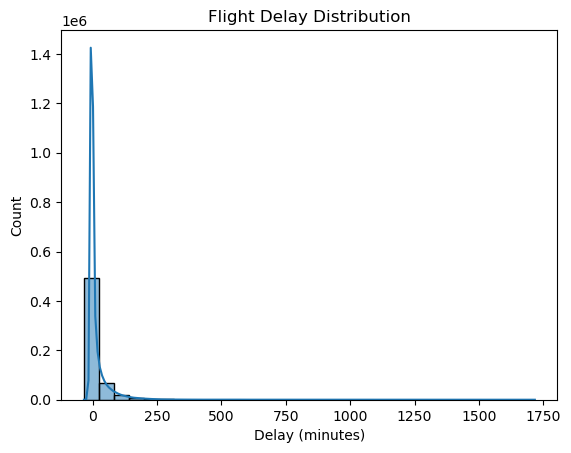

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['DEP_DELAY'], bins=30, kde=True)
plt.title('Flight Delay Distribution')
plt.xlabel('Delay (minutes)')
plt.ylabel('Count')
plt.show()

In [21]:
df = df[df['DEP_DELAY'] <= 1*60]#2 hours
df

WEATHER_DELAY  DEP_DELAY  DEP_DEL15    CRS_DEP_DATETIME  \
1                 NaN       -5.0        0.0 2022-01-01 05:45:00   
3                 NaN       -4.0        0.0 2022-01-01 06:00:00   
5                 NaN       -6.0        0.0 2022-01-01 06:29:00   
6                 NaN       -3.0        0.0 2022-01-01 06:40:00   
7                 NaN      -10.0        0.0 2022-01-01 07:00:00   
...               ...        ...        ...                 ...   
604450            0.0       33.0        1.0 2024-12-31 21:50:00   
604452            NaN       -3.0        0.0 2024-12-31 22:25:00   
604453            0.0       13.0        0.0 2024-12-31 22:25:00   
604454            NaN      -15.0        0.0 2024-12-31 22:30:00   
604455            NaN       -3.0        0.0 2024-12-31 22:30:00   

        HourlyAltimeterSetting  HourlyDewPointTemperature  \
1                       1011.9                       19.0   
3                       1011.9                       18.9   
5                       1012.2                       18.9   
6                       1012.2                       18.0   
7                          NaN                       18.3   
...                        ...                        ...   
604450                  1006.8                        6.1   
604452                     NaN                        6.1   
604453                     NaN                        6.1   
604454                  1007.4                        3.3   
604455                  1007.4                        3.3   

        HourlyDryBulbTemperature HourlyPrecipitation HourlyPresentWeatherType  \
1                           20.0                 NaN               BR:1 |BR |   
3                           20.0                 0.0               BR:1 |BR |   
5                           20.6                 NaN                      NaN   
6                           21.0                 NaN                      NaN   
7                           20.6                 NaN                      NaN   
...                          ...                 ...                      ...   
604450                      12.2                 NaN                      NaN   
604452                      12.2                 NaN                      NaN   
604453                      12.2                 NaN                      NaN   
604454                      11.1                 NaN                      NaN   
604455                      11.1                 NaN                      NaN   

        HourlyPressureChange  HourlyPressureTendency  HourlyRelativeHumidity  \
1                        NaN                     NaN                    94.0   
3                        NaN                     NaN                    93.0   
5                        NaN                     NaN                    90.0   
6                        NaN                     NaN                    83.0   
7                        0.5                     1.0                    87.0   
...                      ...                     ...                     ...   
604450                   2.9                     3.0                    67.0   
604452                   2.9                     3.0                    67.0   
604453                   2.9                     3.0                    67.0   
604454                   NaN                     NaN                    59.0   
604455                   NaN                     NaN                    59.0   

                        HourlySkyConditions  HourlySeaLevelPressure  \
1                               OVC:08 2.74                     NaN   
3                               OVC:08 2.74                  1011.2   
5       SCT:04 2.74 BKN:07 4.27 OVC:08 7.01                     NaN   
6       SCT:04 2.74 BKN:07 4.88 OVC:08 7.32                     NaN   
7                                       NaN                  1011.6   
...                                     ...                     ...   
604450                                 

In [22]:
cloud_types = ["OVC", "BKN", "SCT", "CLR"]
import re
def count_cloud_types(s):
    if pd.isna(s):
        return pd.Series({c: 0 for c in cloud_types})
    counts = {}
    for c in cloud_types:
        counts[c] = len(re.findall(r'\b{}\b'.format(c), str(s)))
    return pd.Series(counts)

cloud_counts = df["HourlySkyConditions"].apply(count_cloud_types)
df = pd.concat([df, cloud_counts], axis=1)

# Weather type encoding
weather_types = ["RA", "SN", "DZ", "FZRA", "PL", "TS", "FG", "BR"]

def encode_weather(s):
    if pd.isna(s):
        return pd.Series({w: 0 for w in weather_types})
    s = str(s).upper()
    result = {}
    for w in weather_types:
        result[w] = 0
        matches = re.findall(r'([+-]?){0}(:\d+)?'.format(w), s)
        if matches:
            for m in matches:
                prefix = m[0]
                if prefix == '+':
                    val = 1
                elif prefix == '-':
                    val = -1
                else:
                    val = 0
                result[w] = max(result[w], val)
    return pd.Series(result)

weather_encoded = df["HourlyPresentWeatherType"].apply(encode_weather)
df = pd.concat([df, weather_encoded], axis=1)

# Handle precipitation (convert 'T' to 0)
df["HourlyPrecipitation"] = df["HourlyPrecipitation"].replace("T", 0).astype(float)

# Prepare features and target for regression
print("Preparing features for regression...")

# Select features for regression
feature_columns = ['HourlyAltimeterSetting', 
                  'HourlyDryBulbTemperature', 'HourlyPrecipitation',
                  'HourlyPressureChange', 'HourlyPressureTendency',
                  'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 
                  'HourlyVisibility', 'HourlyWindGustSpeed', 'HourlyWindSpeed',
                  ]+cloud_types

# Remove rows with missing values in selected features
df_reg = df[['DEP_DELAY'] + feature_columns ].copy()

Preparing features for regression...


In [23]:
non_numeric = df_reg.select_dtypes(exclude=['number']).columns
print(non_numeric)

Index(['HourlyVisibility'], dtype='object')


In [24]:
col='HourlyVisibility'
temp = pd.to_numeric(df_reg[col], errors='coerce')

invalid_mask = temp.isna() & df_reg[col].notna()

print(df_reg.loc[invalid_mask, col])

114601    6.437V
114602    6.437V
114603    6.437V
114604    6.437V
114605    6.437V
           ...  
602711    0.402s
602712    0.402s
602713    0.402s
602715    0.402s
602716    0.402s
Name: HourlyVisibility, Length: 249, dtype: object


In [25]:
for i in non_numeric:
    df_reg[i] = pd.to_numeric(df_reg[i], errors='coerce')
df_reg

DEP_DELAY  HourlyAltimeterSetting  HourlyDryBulbTemperature  \
1            -5.0                  1011.9                      20.0   
3            -4.0                  1011.9                      20.0   
5            -6.0                  1012.2                      20.6   
6            -3.0                  1012.2                      21.0   
7           -10.0                     NaN                      20.6   
...           ...                     ...                       ...   
604450       33.0                  1006.8                      12.2   
604452       -3.0                     NaN                      12.2   
604453       13.0                     NaN                      12.2   
604454      -15.0                  1007.4                      11.1   
604455       -3.0                  1007.4                      11.1   

        HourlyPrecipitation  HourlyPressureChange  HourlyPressureTendency  \
1                       NaN                   NaN                     NaN   
3                       0.0                   NaN                     NaN   
5                       NaN                   NaN                     NaN   
6                       NaN                   NaN                     NaN   
7                       NaN                   0.5                     1.0   
...                     ...                   ...                     ...   
604450                  NaN                   2.9                     3.0   
604452                  NaN                   2.9                     3.0   
604453                  NaN                   2.9                     3.0   
604454                  NaN                   NaN                     NaN   
604455                  NaN                   NaN                     NaN   

        HourlyRelativeHumidity  HourlySeaLevelPressure  HourlyVisibility  \
1                         94.0                     NaN             6.437   
3                         93.0                  1011.2             6.437   
5                         90.0                     NaN            16.093   
6                         83.0                     NaN            16.093   
7                         87.0                  1011.6               NaN   
...                        ...                     ...               ...   
604450                    67.0                  1007.9            16.093   
604452                    67.0                  1007.9            16.000   
604453                    67.0                  1007.9            16.000   
604454                    59.0                  1008.6            16.093   
604455                    59.0                  1008.6            16.093   

        HourlyWindGustSpeed  HourlyWindSpeed  OVC  BKN  SCT  CLR  
1                       NaN              5.7    1    0    0    0  
3                       NaN              5.7    1    0    0    0  
5                      10.8              5.7    1    1    1    0  
6                       NaN              5.7    1    1    1    0  
7                       NaN              5.1    0    0    0    0  
...                     ...              ...  ...  ...  ...  ...  
604450                  NaN              3.1    0    0    0    0  
604452                  NaN              3.1    0    0    0    0  
604453                  NaN              3.1    0    0    0    0  
604454                  NaN              2.1    0    0    0    0  
604455                  NaN              2.1    0    0    0    0  

[544482 rows x 15 columns]

描述性统计:
          DEP_DELAY  HourlyAltimeterSetting  HourlyDryBulbTemperature  \
count  544482.00000           449850.000000             543550.000000   
mean        3.11097             1018.134122                 18.898562   
std        14.24121                7.164385                  8.396312   
min       -34.00000              116.500000                -12.800000   
25%        -5.00000             1014.200000                 12.800000   
50%        -2.00000             1017.900000                 20.000000   
75%         5.00000             1022.000000                 25.600000   
max        60.00000             1041.700000                 38.300000   

       HourlyPrecipitation  HourlyPressureChange  HourlyPressureTendency  \
count        377438.000000         152085.000000           152085.000000   
mean              0.105045             -0.027977                4.591314   
std               0.759235              1.442195                2.782219   
min               0.000000     

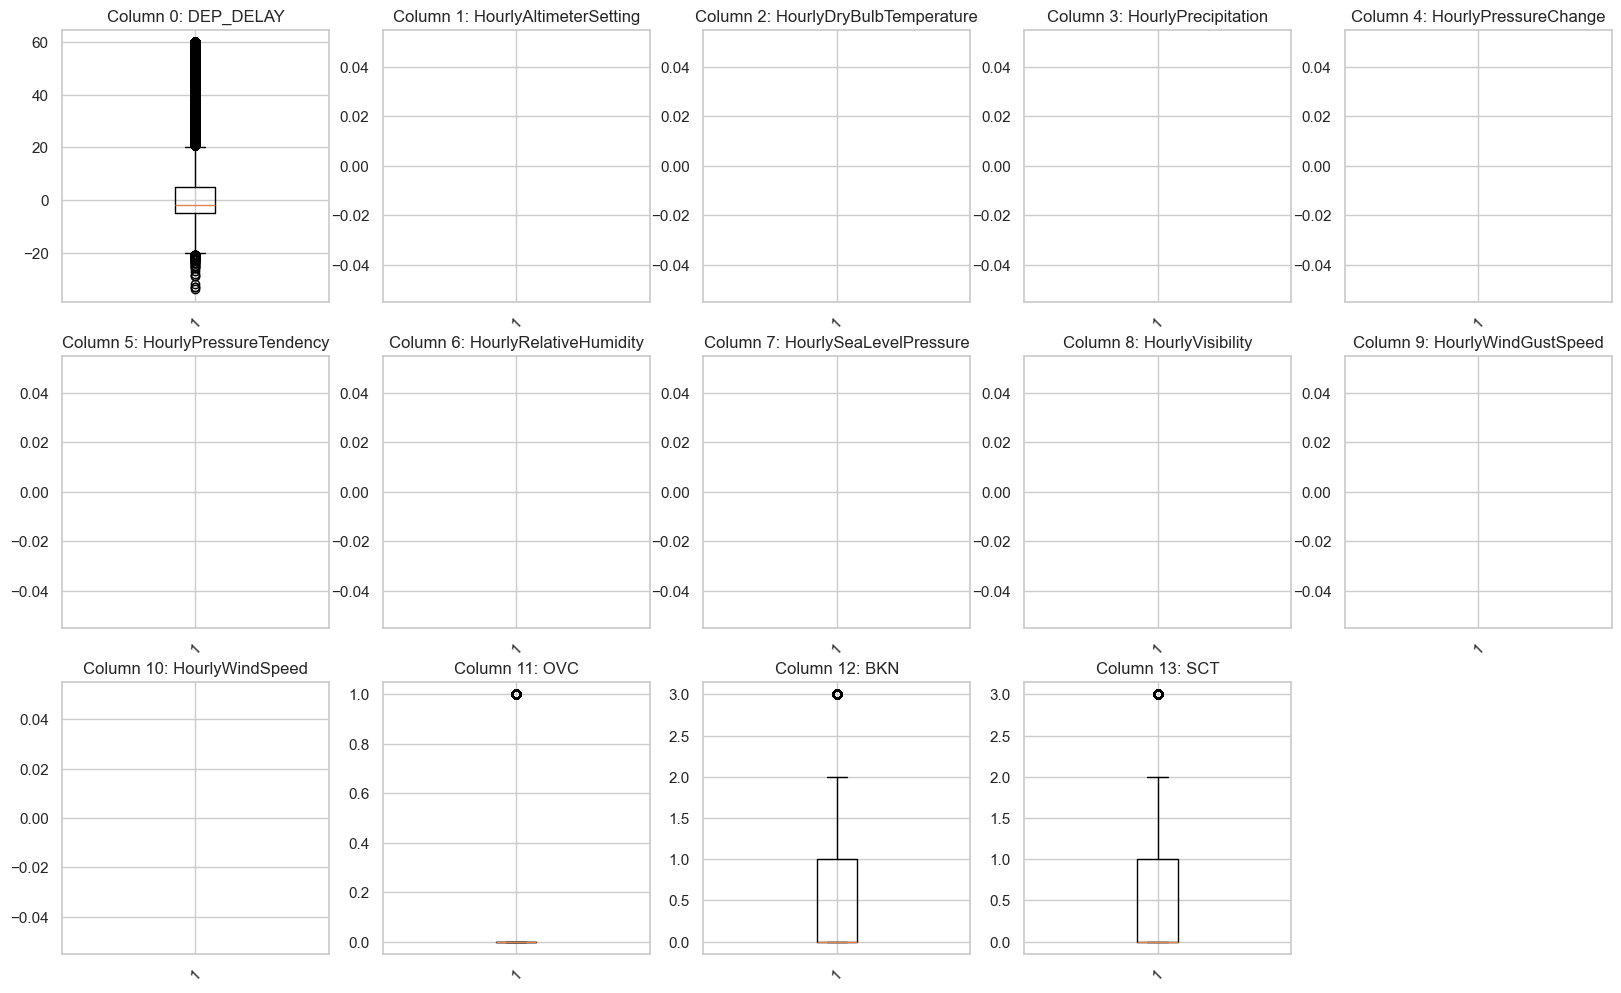

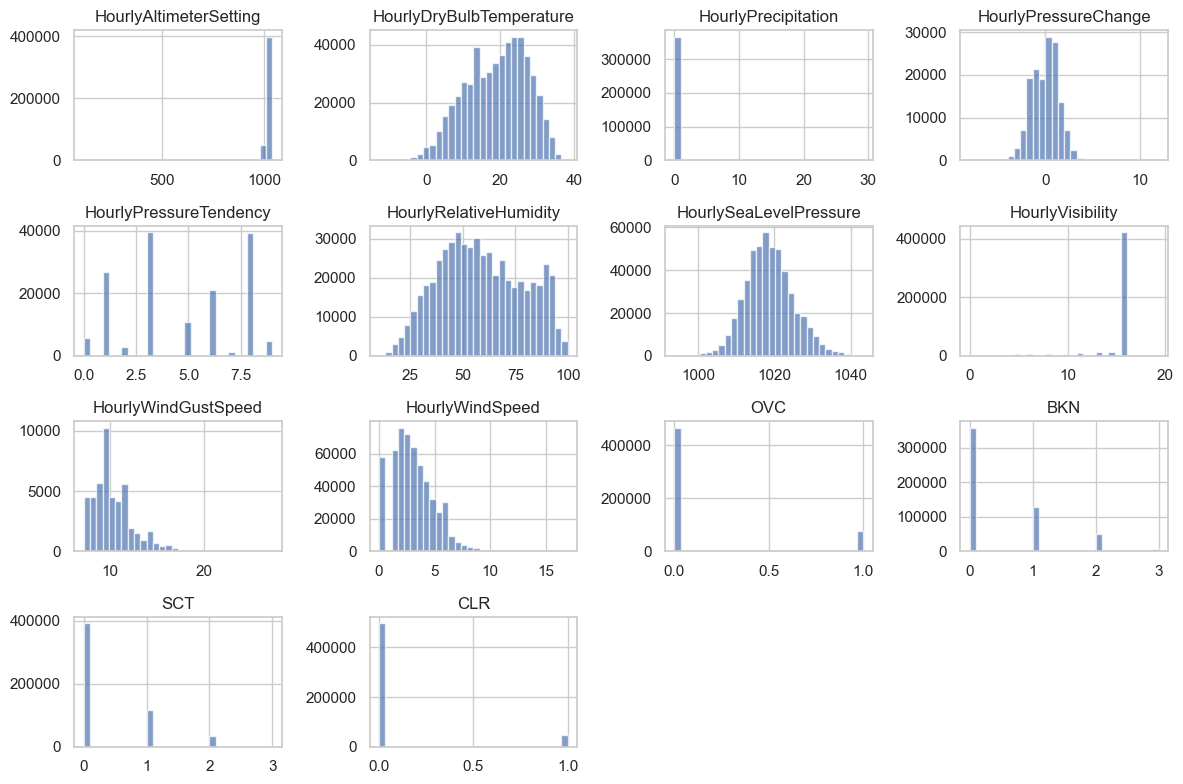


Pairwise散点图:


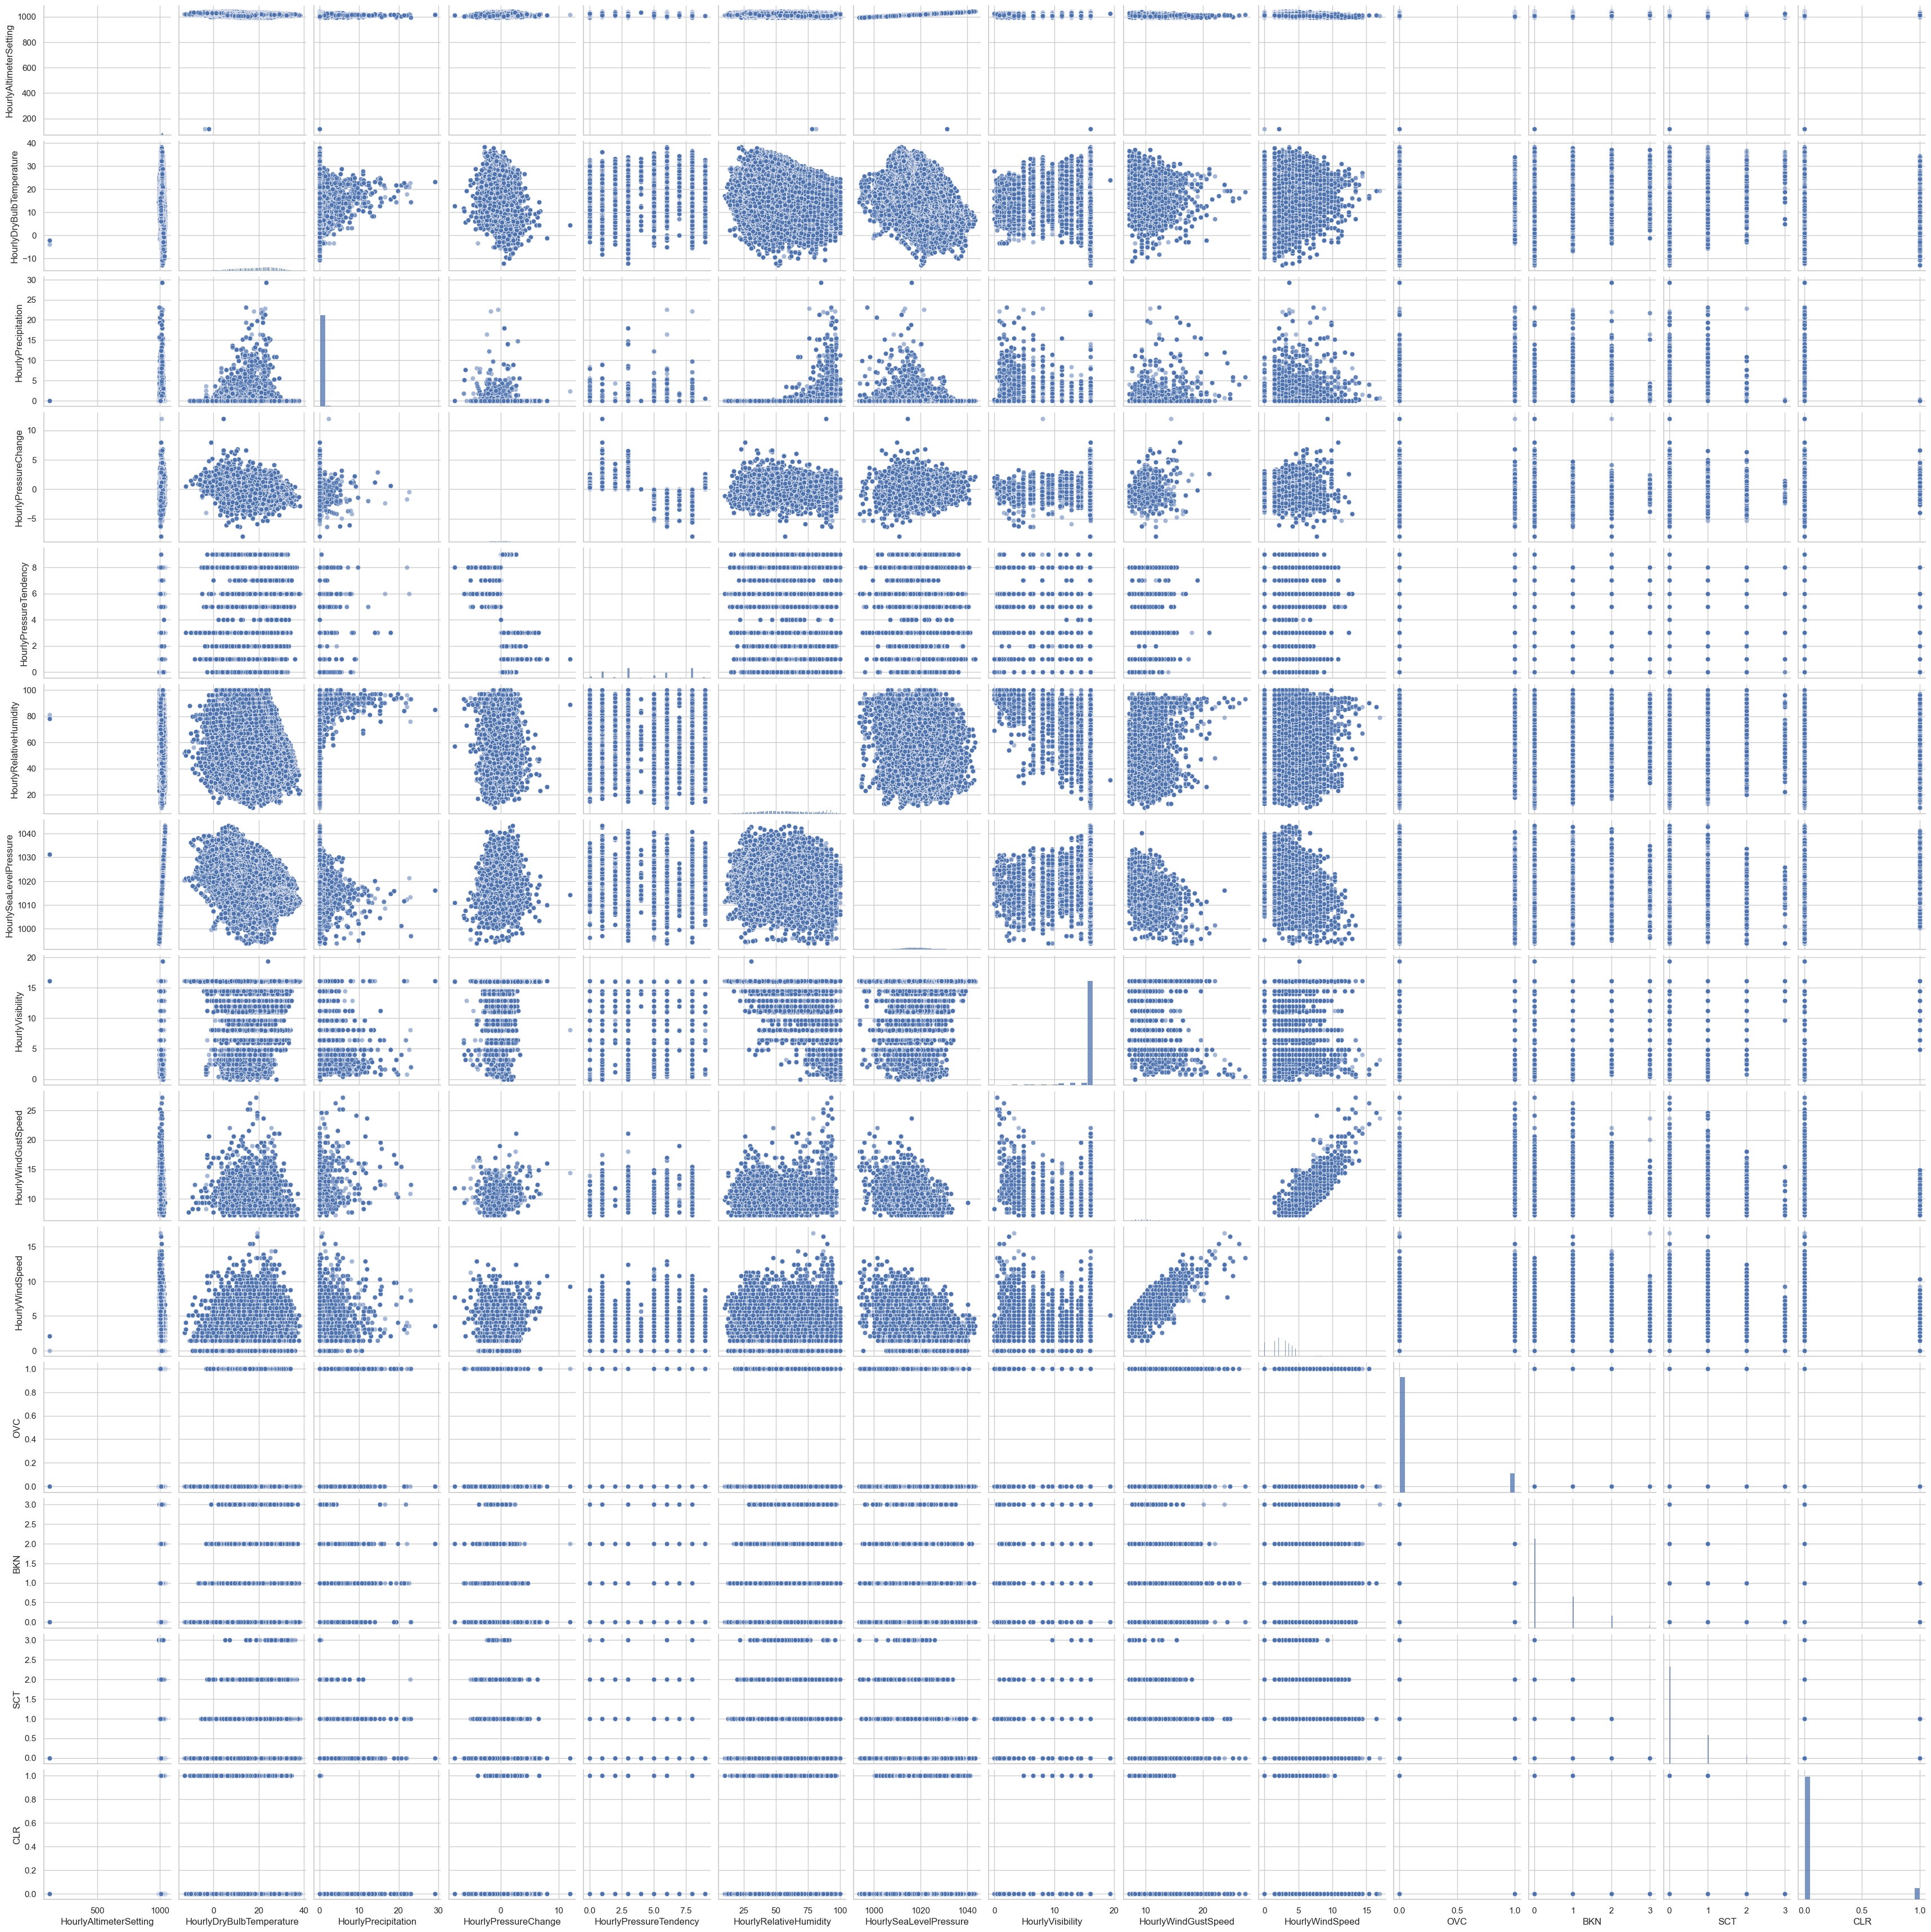


相关性热力图:


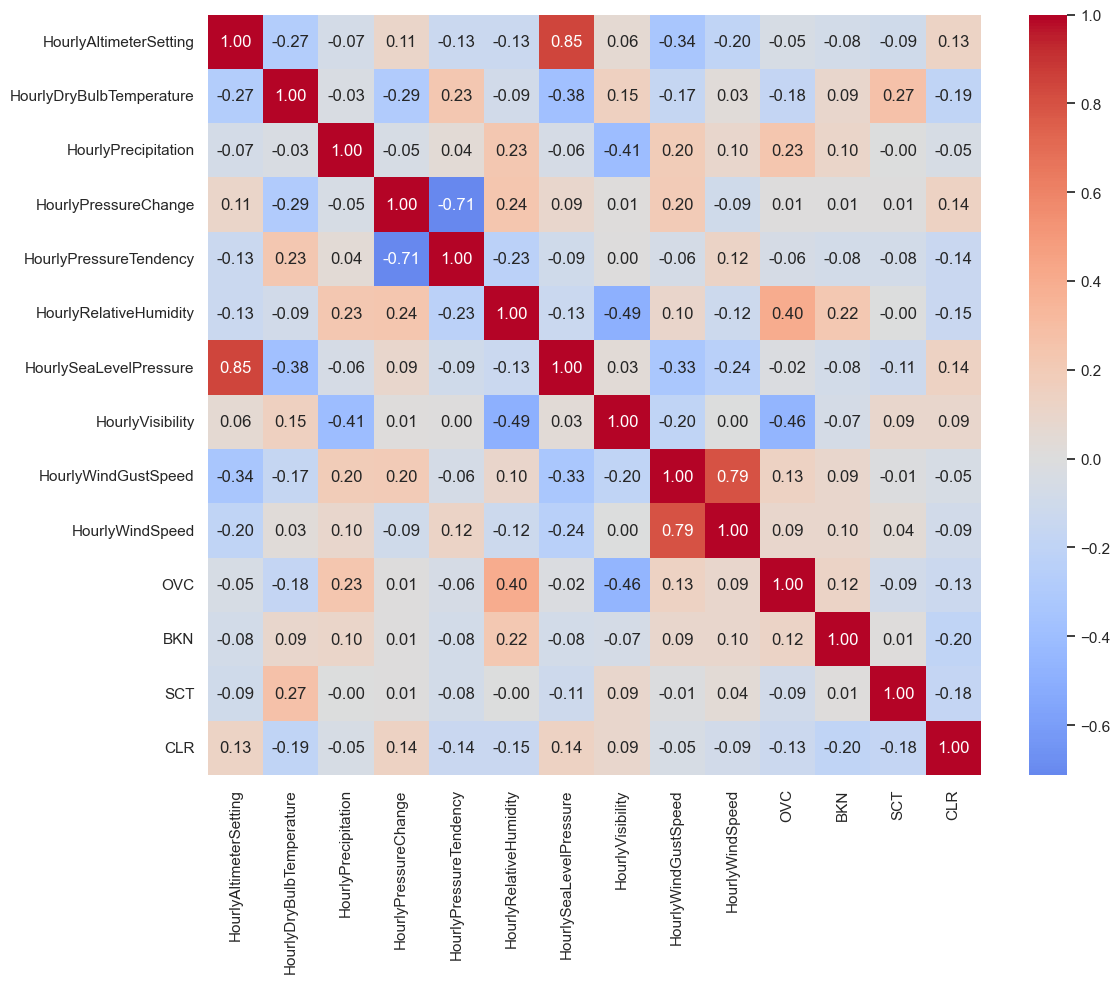

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置图形样式
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# 描述性统计（第0列-第13列）
print("描述性统计:")
print(df_reg.iloc[:, 0:15].describe())

print("\n异常值分布 - 箱线图:")
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.ravel()

for i in range(14):
    if i < len(axes):
        axes[i].boxplot(df_reg.iloc[:, i])
        axes[i].set_title(f'Column {i}: {df_reg.columns[i]}')
        axes[i].tick_params(axis='x', rotation=45)

# 隐藏多余的子图
for i in range(14, len(axes)):
    axes[i].set_visible(False)

# 单变量分布图（第1列-第13列）
print("\n单变量分布图:")
df_reg.iloc[:, 1:15].hist(bins=30, alpha=0.7, layout=(4, 4))
plt.tight_layout()
plt.show()

# Pairwise散点图（选择前6列避免图形过于拥挤）
print("\nPairwise散点图:")
numeric_cols = df_reg.select_dtypes(include=[np.number]).columns[1:15]  # 取前6个数值列
sns.pairplot(df_reg[numeric_cols], diag_kind='hist', plot_kws={'alpha': 0.5})
plt.show()

# 相关性热力图（第1列-第13列）
print("\n相关性热力图:")
corr_matrix = df_reg.iloc[:, 1:15].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.tight_layout()
plt.show()

In [27]:
df_reg = df_reg.dropna(thresh=df_reg.shape[1] - 2)
imputer = IterativeImputer(random_state=0)
df_imputed = pd.DataFrame(imputer.fit_transform(df_reg), columns=df_reg.columns)
df_reg=df_imputed

/opt/anaconda3/lib/python3.13/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [28]:
X = df_reg[feature_columns]
y = df_reg['DEP_DELAY']  # Target variable: flight delay time

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (93052, 14)
Target shape: (93052,)


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import f_regression
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
import re
import warnings

FEATURE IMPORTANCE ANALYSIS AND SELECTION
Dataset shape: X=(93052, 14), y=(93052,)
Number of features: 14
Features: ['HourlyAltimeterSetting', 'HourlyDryBulbTemperature', 'HourlyPrecipitation', 'HourlyPressureChange', 'HourlyPressureTendency', 'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlyVisibility', 'HourlyWindGustSpeed', 'HourlyWindSpeed', 'OVC', 'BKN', 'SCT', 'CLR']

1. CALCULATING FEATURE IMPORTANCE USING MUTUAL INFORMATION
Feature Importance Ranking (mutual_info):
 1. HourlyPressureTendency    Importance: 0.3357
 2. HourlyPressureChange      Importance: 0.3054
 3. HourlyWindGustSpeed       Importance: 0.2333
 4. HourlyPrecipitation       Importance: 0.0299
 5. HourlySeaLevelPressure    Importance: 0.0173
 6. HourlyAltimeterSetting    Importance: 0.0091
 7. SCT                       Importance: 0.0068
 8. HourlyVisibility          Importance: 0.0053
 9. HourlyRelativeHumidity    Importance: 0.0049
10. HourlyDryBulbTemperature  Importance: 0.0045
11. HourlyWindSpeed   

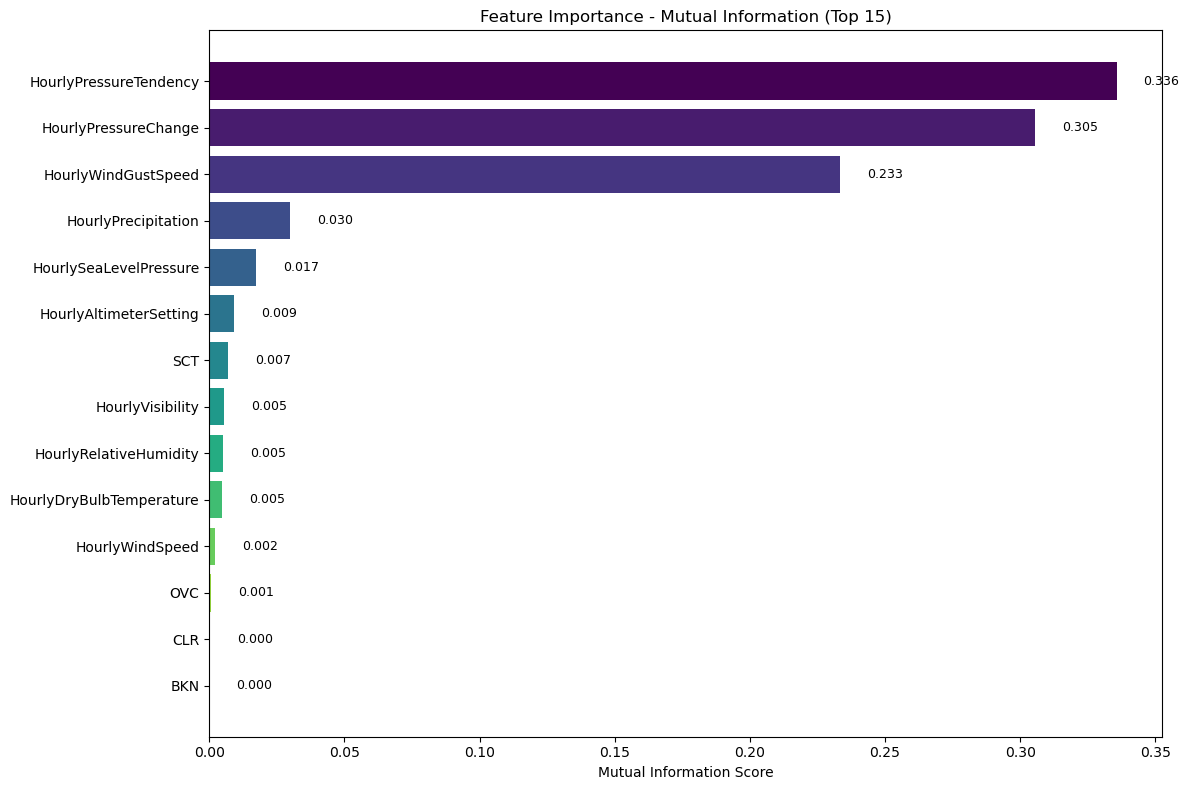


F-Test Feature Importance:


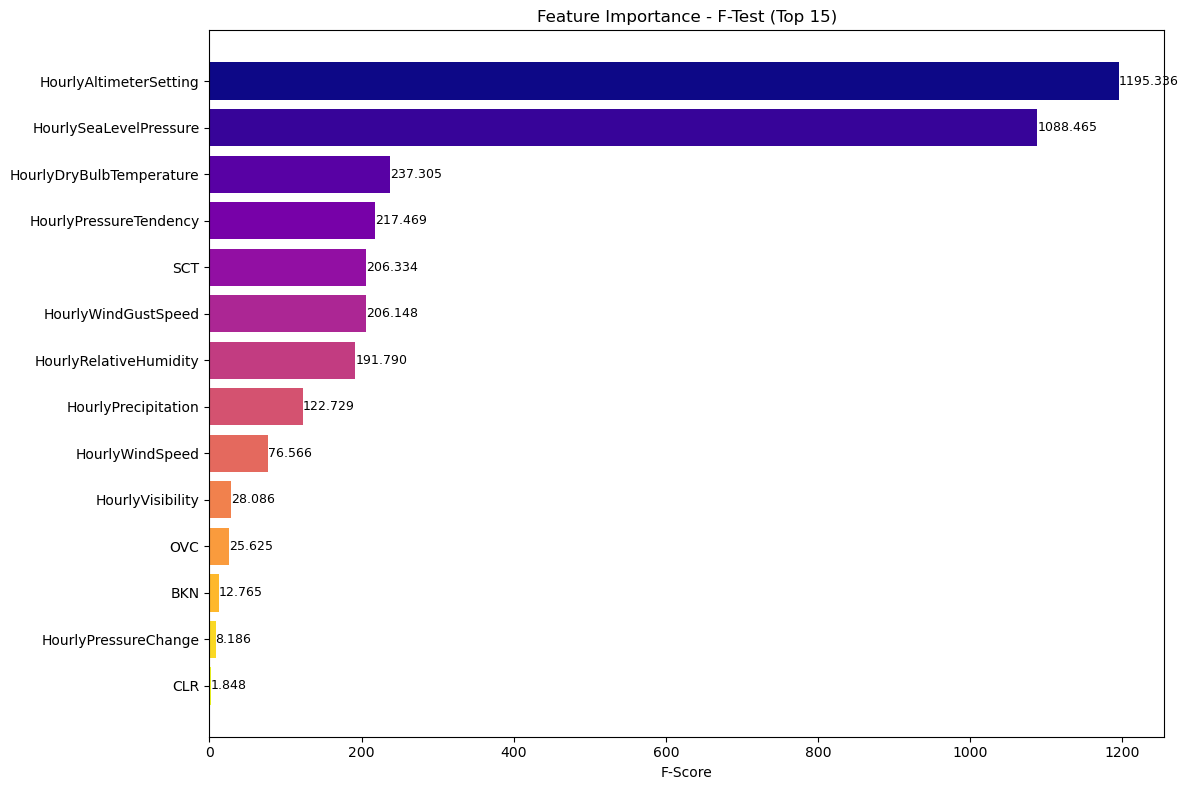


Weighted Feature Importance:


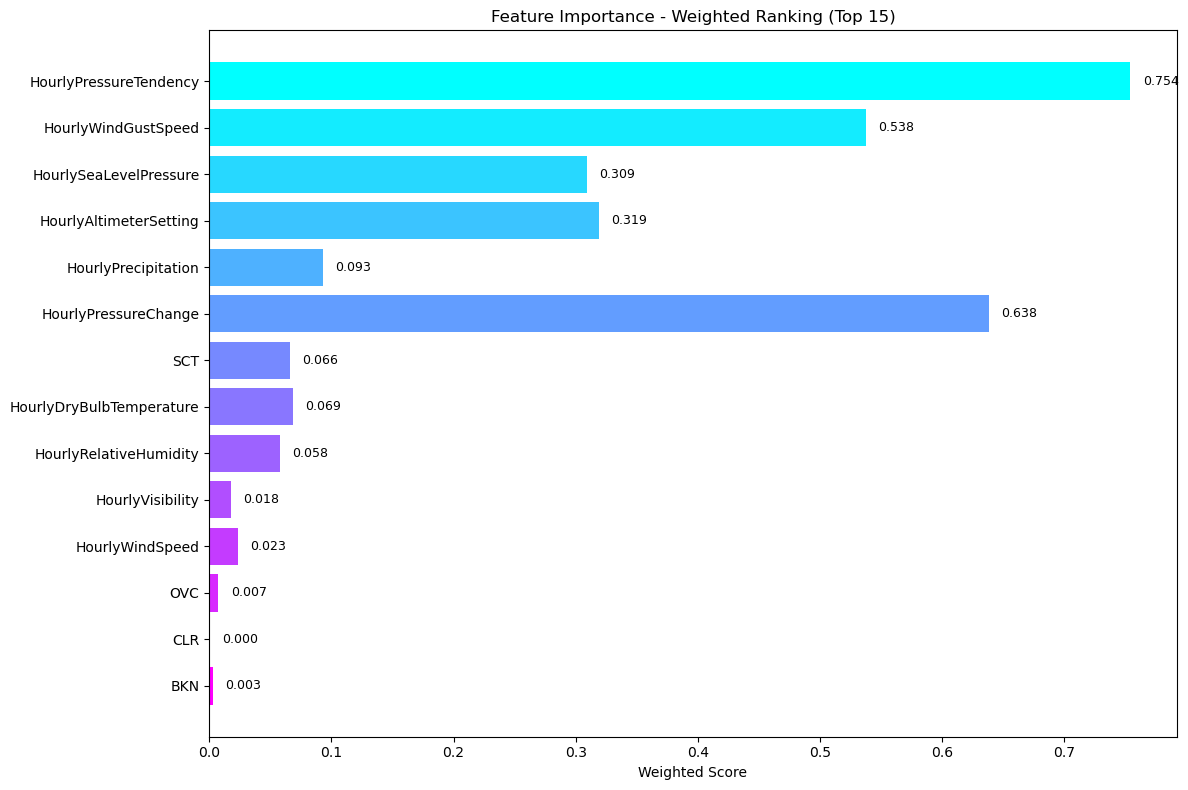


5. COMPARING FEATURE RANKINGS

Comparison of Top 15 Features:
Features common to all three methods: 14
Common features: ['HourlyPressureTendency', 'HourlyPrecipitation', 'SCT', 'HourlyPressureChange', 'HourlyWindGustSpeed', 'HourlyDryBulbTemperature', 'HourlyRelativeHumidity', 'HourlyVisibility', 'OVC', 'HourlyWindSpeed', 'CLR', 'HourlyAltimeterSetting', 'HourlySeaLevelPressure', 'BKN']

Features only in Weighted top 15: 0

Top 15 features with largest ranking differences (MI vs F):
                 Feature  MI_Rank  F_Rank  MI_F_Rank_Diff
  HourlyAltimeterSetting        1       1               0
HourlyDryBulbTemperature        2       2               0
     HourlyPrecipitation        3       3               0
    HourlyPressureChange        4       4               0
  HourlyPressureTendency        5       5               0
  HourlyRelativeHumidity        6       6               0
  HourlySeaLevelPressure        7       7               0
        HourlyVisibility        8       8      

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression, f_regression

# 修复list函数
import builtins
list_func = builtins.list

# 设置图形样式
plt.style.use('default')
sns.set_palette("husl")

def calculate_feature_importance(X, y, method='mutual_info'):
    """
    计算特征重要性，不进行自动特征选择
    """
    if method == 'mutual_info':
        # 使用互信息计算特征重要性
        scores = mutual_info_regression(X, y, random_state=42)
        importance_df = pd.DataFrame({
            'Feature': X.columns,
            'Importance': scores,
            'Method': 'Mutual Information'
        }).sort_values('Importance', ascending=False)
    
    elif method == 'f_test':
        # 使用F检验计算特征重要性
        f_scores, p_values = f_regression(X, y)
        importance_df = pd.DataFrame({
            'Feature': X.columns,
            'Importance': f_scores,
            'P_Value': p_values,
            'Method': 'F-Test'
        }).sort_values('Importance', ascending=False)
    
    print(f"Feature Importance Ranking ({method}):")
    print("=" * 50)
    for i, (_, row) in enumerate(importance_df.iterrows(), 1):
        if method == 'mutual_info':
            print(f"{i:2d}. {row['Feature']:<25} Importance: {row['Importance']:.4f}")
        else:
            print(f"{i:2d}. {row['Feature']:<25} F-Score: {row['Importance']:.2f}, p-value: {row['P_Value']:.4f}")
    
    return importance_df

def calculate_weighted_ranking(mi_importance, f_importance, mi_weight=0.7, f_weight=0.3):
    """
    计算加权排名，结合互信息和F检验的结果
    """
    # 为每个方法创建排名
    mi_rank = mi_importance.copy()
    mi_rank['MI_Rank'] = range(1, len(mi_rank) + 1)
    
    f_rank = f_importance.copy()
    f_rank['F_Rank'] = range(1, len(f_rank) + 1)
    
    # 合并排名
    combined_df = pd.merge(mi_rank[['Feature', 'MI_Rank', 'Importance']], 
                          f_rank[['Feature', 'F_Rank', 'Importance']], 
                          on='Feature', suffixes=('_MI', '_F'))
    
    # 计算加权排名
    combined_df['Weighted_Rank'] = (mi_weight * combined_df['MI_Rank'] + 
                                   f_weight * combined_df['F_Rank'])
    
    # 计算加权得分（标准化后的重要性）
    combined_df['MI_Score_Norm'] = (combined_df['Importance_MI'] - combined_df['Importance_MI'].min()) / (combined_df['Importance_MI'].max() - combined_df['Importance_MI'].min())
    combined_df['F_Score_Norm'] = (combined_df['Importance_F'] - combined_df['Importance_F'].min()) / (combined_df['Importance_F'].max() - combined_df['Importance_F'].min())
    combined_df['Weighted_Score'] = (mi_weight * combined_df['MI_Score_Norm'] + 
                                    f_weight * combined_df['F_Score_Norm'])
    
    # 按加权排名排序
    weighted_ranking = combined_df.sort_values('Weighted_Rank')
    weighted_ranking['Weighted_Rank_Final'] = range(1, len(weighted_ranking) + 1)
    
    print(f"\nWeighted Feature Ranking (MI weight: {mi_weight}, F weight: {f_weight}):")
    print("=" * 60)
    for i, (_, row) in enumerate(weighted_ranking.iterrows(), 1):
        print(f"{i:2d}. {row['Feature']:<25} "
              f"MI Rank: {row['MI_Rank']:2d}, "
              f"F Rank: {row['F_Rank']:2d}, "
              f"Weighted Score: {row['Weighted_Score']:.4f}")
    
    return weighted_ranking

def plot_feature_importance(importance_df, method, k=None):
    """
    可视化特征重要性
    """
    if k is not None:
        plot_data = importance_df.head(k)
        title_suffix = f" (Top {k})"
    else:
        plot_data = importance_df
        title_suffix = ""
    
    plt.figure(figsize=(12, 8))
    
    if method == 'mutual_info':
        colors = plt.cm.viridis(np.linspace(0, 1, len(plot_data)))
        bars = plt.barh(range(len(plot_data)), plot_data['Importance'], color=colors)
        plt.xlabel('Mutual Information Score')
        plt.title(f'Feature Importance - Mutual Information{title_suffix}')
    elif method == 'f_test':
        colors = plt.cm.plasma(np.linspace(0, 1, len(plot_data)))
        bars = plt.barh(range(len(plot_data)), plot_data['Importance'], color=colors)
        plt.xlabel('F-Score')
        plt.title(f'Feature Importance - F-Test{title_suffix}')
    else:  # weighted
        colors = plt.cm.cool(np.linspace(0, 1, len(plot_data)))
        bars = plt.barh(range(len(plot_data)), plot_data['Weighted_Score'], color=colors)
        plt.xlabel('Weighted Score')
        plt.title(f'Feature Importance - Weighted Ranking{title_suffix}')
    
    plt.yticks(range(len(plot_data)), plot_data['Feature'])
    plt.gca().invert_yaxis()
    
    # 添加数值标签
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{width:.3f}', ha='left', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()

def select_features_by_k(X, importance_df, k):
    """
    根据重要性排名选择前k个特征
    """
    if k > len(importance_df):
        k = len(importance_df)
        print(f"Warning: k value reduced to {k} (maximum available features)")
    
    # 根据DataFrame的类型选择正确的列名
    if 'Feature' in importance_df.columns:
        selected_features = importance_df.head(k)['Feature'].values
    else:
        selected_features = importance_df.head(k).index.values
    
    X_selected = X[selected_features]
    
    print(f"Selected top {k} features:")
    for i, feature in enumerate(selected_features, 1):
        print(f"{i:2d}. {feature}")
    
    return X_selected

def compare_feature_rankings(mi_importance, f_importance, weighted_ranking, top_n=15):
    """
    比较三种方法的特征排名
    """
    # 获取三种方法的前top_n个特征
    mi_top = mi_importance.head(top_n)['Feature'].values
    f_top = f_importance.head(top_n)['Feature'].values
    weighted_top = weighted_ranking.head(top_n)['Feature'].values
    
    # 找出共同的特征
    common_features = set(mi_top) & set(f_top) & set(weighted_top)
    
    print(f"\nComparison of Top {top_n} Features:")
    print("=" * 60)
    print(f"Features common to all three methods: {len(common_features)}")
    print("Common features:", list_func(common_features))
    
    # 只在加权排名中的特征
    only_weighted = set(weighted_top) - (set(mi_top) | set(f_top))
    print(f"\nFeatures only in Weighted top {top_n}: {len(only_weighted)}")
    if only_weighted:
        print("Only in Weighted:", list_func(only_weighted))
    
    # 创建比较表格
    comparison_df = pd.DataFrame({
        'Feature': mi_importance['Feature'],
        'MI_Rank': range(1, len(mi_importance) + 1),
        'MI_Score': mi_importance['Importance'],
        'F_Rank': range(1, len(f_importance) + 1),
        'F_Score': f_importance['Importance'],
        'Weighted_Rank': weighted_ranking['Weighted_Rank_Final'],
        'Weighted_Score': weighted_ranking['Weighted_Score']
    })
    
    # 计算排名差异
    comparison_df['MI_F_Rank_Diff'] = comparison_df['MI_Rank'] - comparison_df['F_Rank']
    comparison_df['Weighted_Avg_Rank_Diff'] = comparison_df['Weighted_Rank'] - (comparison_df['MI_Rank'] + comparison_df['F_Rank']) / 2
    
    print(f"\nTop {top_n} features with largest ranking differences (MI vs F):")
    large_diff = comparison_df.head(top_n).nlargest(5, 'MI_F_Rank_Diff', keep='all')
    print(large_diff[['Feature', 'MI_Rank', 'F_Rank', 'MI_F_Rank_Diff']].to_string(index=False))
    
    return comparison_df

print("=" * 70)
print("FEATURE IMPORTANCE ANALYSIS AND SELECTION")
print("=" * 70)

# 显示数据集基本信息
print(f"Dataset shape: X={X.shape}, y={y.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Features: {X.columns.tolist()}")  # 使用tolist()避免list函数问题

# 1. 计算特征重要性（使用互信息）
print("\n" + "=" * 70)
print("1. CALCULATING FEATURE IMPORTANCE USING MUTUAL INFORMATION")
print("=" * 70)
mi_importance = calculate_feature_importance(X, y, method='mutual_info')

# 2. 计算特征重要性（使用F检验）
print("\n" + "=" * 70)
print("2. CALCULATING FEATURE IMPORTANCE USING F-TEST")
print("=" * 70)
f_importance = calculate_feature_importance(X, y, method='f_test')

# 3. 计算加权排名
print("\n" + "=" * 70)
print("3. CALCULATING WEIGHTED RANKING")
print("=" * 70)
# 可以调整权重，默认为互信息70%，F检验30%
weighted_ranking = calculate_weighted_ranking(mi_importance, f_importance, mi_weight=0.7, f_weight=0.3)

# 4. 可视化特征重要性
print("\n" + "=" * 70)
print("4. VISUALIZING FEATURE IMPORTANCE")
print("=" * 70)

# 互信息可视化
print("\nMutual Information Feature Importance:")
plot_feature_importance(mi_importance, method='mutual_info', k=15)

# F检验可视化
print("\nF-Test Feature Importance:")
plot_feature_importance(f_importance, method='f_test', k=15)

# 加权排名可视化
print("\nWeighted Feature Importance:")
plot_feature_importance(weighted_ranking, method='weighted', k=15)

# 5. 比较三种方法的排名
print("\n" + "=" * 70)
print("5. COMPARING FEATURE RANKINGS")
print("=" * 70)
comparison_df = compare_feature_rankings(mi_importance, f_importance, weighted_ranking, top_n=15)

# 6. 特征选择指南
print("\n" + "=" * 70)
print("6. FEATURE SELECTION GUIDE")
print("=" * 70)
print("To select features, use the following function:")
print("\n  X_selected = select_features_by_k(X, importance_df, k=desired_k)")
print("\nWhere:")
print("  - importance_df: mi_importance (Mutual Information)")
print("  - importance_df: f_importance (F-Test)")
print("  - importance_df: weighted_ranking (Weighted Ranking)")
print("  - desired_k: number of top features to select (integer)")
print("\nExamples:")
print("  # Select top 10 features using Mutual Information")
print("  X_mi_10 = select_features_by_k(X, mi_importance, k=10)")
print("\n  # Select top 8 features using Weighted Ranking")
print("  X_weighted_8 = select_features_by_k(X, weighted_ranking, k=8)")

# 7. 准备特征选择
print("\n" + "=" * 70)
print("7. READY FOR MANUAL FEATURE SELECTION")
print("=" * 70)
print("You can now manually select features by running:")
print("\n# Example 1: Select top 10 features using Weighted Ranking")
print("X_selected = select_features_by_k(X, weighted_ranking, k=10)")
print("print(f'Selected features shape: {X_selected.shape}')")
print("\n# Example 2: Try different k values")
print("for k in [5, 8, 10, 12, 15]:")
print("    X_selected = select_features_by_k(X, weighted_ranking, k=k)")
print("    print(f'k={k}: {X_selected.shape}')")

print("\n" + "=" * 70)
print("ANALYSIS COMPLETE - READY FOR MODELING")
print("=" * 70)

In [30]:
k = 12  # 在这里修改k值
X = select_features_by_k(X, mi_importance, k=k)
print(f"Selected features shape: {X.shape}")

Selected top 12 features:
 1. HourlyPressureTendency
 2. HourlyPressureChange
 3. HourlyWindGustSpeed
 4. HourlyPrecipitation
 5. HourlySeaLevelPressure
 6. HourlyAltimeterSetting
 7. SCT
 8. HourlyVisibility
 9. HourlyRelativeHumidity
10. HourlyDryBulbTemperature
11. HourlyWindSpeed
12. OVC
Selected features shape: (93052, 12)


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import numpy as np

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model with optimal parameters
rf = RandomForestRegressor(
    random_state=42,
    n_estimators=500,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=False
)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Function to calculate multiple evaluation metrics
def calculate_metrics(y_true, y_pred, prefix=""):
    metrics = {}
    metrics[f'{prefix}R2'] = r2_score(y_true, y_pred)
    metrics[f'{prefix}MAE'] = mean_absolute_error(y_true, y_pred)
    metrics[f'{prefix}MSE'] = mean_squared_error(y_true, y_pred)
    metrics[f'{prefix}RMSE'] = np.sqrt(mean_squared_error(y_true, y_pred))
    metrics[f'{prefix}MAPE'] = mean_absolute_percentage_error(y_true, y_pred)
    
    # Calculate Adjusted R²
    n = len(y_true)
    p = X_train.shape[1]  # Number of features
    r2 = r2_score(y_true, y_pred)
    metrics[f'{prefix}Adjusted_R2'] = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return metrics

# Calculate metrics for training and test sets
rf_train_metrics = calculate_metrics(y_train, y_pred_train, "RF_Train_")
rf_test_metrics = calculate_metrics(y_test, y_pred_test, "RF_Test_")

# Combine all metrics
rf_metrics = {**rf_train_metrics, **rf_test_metrics}

# Print RF model evaluation metrics
print("=" * 60)
print("Random Forest Model (RF) Evaluation Metrics")
print("=" * 60)
print("\nTraining Set Metrics:")
print(f"  RF_Train_R2 (R-squared): {rf_metrics['RF_Train_R2']:.6f}")
print(f"  RF_Train_Adjusted_R2 (Adjusted R-squared): {rf_metrics['RF_Train_Adjusted_R2']:.6f}")
print(f"  RF_Train_MAE (Mean Absolute Error): {rf_metrics['RF_Train_MAE']:.6f}")
print(f"  RF_Train_MSE (Mean Squared Error): {rf_metrics['RF_Train_MSE']:.6f}")
print(f"  RF_Train_RMSE (Root Mean Squared Error): {rf_metrics['RF_Train_RMSE']:.6f}")
print(f"  RF_Train_MAPE (Mean Absolute Percentage Error): {rf_metrics['RF_Train_MAPE']:.6f}")

print("\nTest Set Metrics:")
print(f"  RF_Test_R2 (R-squared): {rf_metrics['RF_Test_R2']:.6f}")
print(f"  RF_Test_Adjusted_R2 (Adjusted R-squared): {rf_metrics['RF_Test_Adjusted_R2']:.6f}")
print(f"  RF_Test_MAE (Mean Absolute Error): {rf_metrics['RF_Test_MAE']:.6f}")
print(f"  RF_Test_MSE (Mean Squared Error): {rf_metrics['RF_Test_MSE']:.6f}")
print(f"  RF_Test_RMSE (Root Mean Squared Error): {rf_metrics['RF_Test_RMSE']:.6f}")
print(f"  RF_Test_MAPE (Mean Absolute Percentage Error): {rf_metrics['RF_Test_MAPE']:.6f}")

# Calculate overfitting gap
overfitting_gap = rf_metrics['RF_Train_R2'] - rf_metrics['RF_Test_R2']
print(f"\nOverfitting Gap (Training R² - Test R²): {overfitting_gap:.6f}")

# Store RF model results for future comparison with other models
rf_results = {
    'model': 'RandomForest',
    'metrics': rf_metrics,
    'model_object': rf,
    'predictions': {
        'train': y_pred_train,
        'test': y_pred_test
    }
}

print("\n" + "=" * 60)
print("RF Model Training Completed - Metrics Saved for Future Model Comparison")
print("=" * 60)

# Display model parameters
print("\nRandom Forest Model Parameters:")
print(f"  n_estimators: {rf.n_estimators}")
print(f"  max_depth: {rf.max_depth}")
print(f"  min_samples_split: {rf.min_samples_split}")
print(f"  min_samples_leaf: {rf.min_samples_leaf}")
print(f"  max_features: {rf.max_features}")
print(f"  bootstrap: {rf.bootstrap}")
print(f"  random_state: {rf.random_state}")

Random Forest Model (RF) Evaluation Metrics

Training Set Metrics:
  RF_Train_R2 (R-squared): 0.948863
  RF_Train_Adjusted_R2 (Adjusted R-squared): 0.948855
  RF_Train_MAE (Mean Absolute Error): 1.177366
  RF_Train_MSE (Mean Squared Error): 10.598688
  RF_Train_RMSE (Root Mean Squared Error): 3.255563
  RF_Train_MAPE (Mean Absolute Percentage Error): 77698863584676.437500

Test Set Metrics:
  RF_Test_R2 (R-squared): 0.740031
  RF_Test_Adjusted_R2 (Adjusted R-squared): 0.739863
  RF_Test_MAE (Mean Absolute Error): 3.279916
  RF_Test_MSE (Mean Squared Error): 55.151098
  RF_Test_RMSE (Root Mean Squared Error): 7.426379
  RF_Test_MAPE (Mean Absolute Percentage Error): 260597368429446.781250

Overfitting Gap (Training R² - Test R²): 0.208833

RF Model Training Completed - Metrics Saved for Future Model Comparison

Random Forest Model Parameters:
  n_estimators: 500
  max_depth: 30
  min_samples_split: 2
  min_samples_leaf: 1
  max_features: sqrt
  bootstrap: False
  random_state: 42


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import numpy as np

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model with optimal parameters
rf = RandomForestRegressor(
    random_state=42,
    n_estimators=500,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=False
)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Function to calculate multiple evaluation metrics
def calculate_metrics(y_true, y_pred, prefix=""):
    metrics = {}
    metrics[f'{prefix}R2'] = r2_score(y_true, y_pred)
    metrics[f'{prefix}MAE'] = mean_absolute_error(y_true, y_pred)
    metrics[f'{prefix}MSE'] = mean_squared_error(y_true, y_pred)
    metrics[f'{prefix}RMSE'] = np.sqrt(mean_squared_error(y_true, y_pred))
    metrics[f'{prefix}MAPE'] = mean_absolute_percentage_error(y_true, y_pred)
    
    # Calculate Adjusted R²
    n = len(y_true)
    p = X_train.shape[1]  # Number of features
    r2 = r2_score(y_true, y_pred)
    metrics[f'{prefix}Adjusted_R2'] = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return metrics

# Calculate metrics for training and test sets
rf_train_metrics = calculate_metrics(y_train, y_pred_train, "RF_Train_")
rf_test_metrics = calculate_metrics(y_test, y_pred_test, "RF_Test_")

# Combine all metrics
rf_metrics = {**rf_train_metrics, **rf_test_metrics}

# Print RF model evaluation metrics
print("=" * 60)
print("Random Forest Model (RF) Evaluation Metrics")
print("=" * 60)
print("\nTraining Set Metrics:")
print(f"  RF_Train_R2 (R-squared): {rf_metrics['RF_Train_R2']:.6f}")
print(f"  RF_Train_Adjusted_R2 (Adjusted R-squared): {rf_metrics['RF_Train_Adjusted_R2']:.6f}")
print(f"  RF_Train_MAE (Mean Absolute Error): {rf_metrics['RF_Train_MAE']:.6f}")
print(f"  RF_Train_MSE (Mean Squared Error): {rf_metrics['RF_Train_MSE']:.6f}")
print(f"  RF_Train_RMSE (Root Mean Squared Error): {rf_metrics['RF_Train_RMSE']:.6f}")
print(f"  RF_Train_MAPE (Mean Absolute Percentage Error): {rf_metrics['RF_Train_MAPE']:.6f}")

print("\nTest Set Metrics:")
print(f"  RF_Test_R2 (R-squared): {rf_metrics['RF_Test_R2']:.6f}")
print(f"  RF_Test_Adjusted_R2 (Adjusted R-squared): {rf_metrics['RF_Test_Adjusted_R2']:.6f}")
print(f"  RF_Test_MAE (Mean Absolute Error): {rf_metrics['RF_Test_MAE']:.6f}")
print(f"  RF_Test_MSE (Mean Squared Error): {rf_metrics['RF_Test_MSE']:.6f}")
print(f"  RF_Test_RMSE (Root Mean Squared Error): {rf_metrics['RF_Test_RMSE']:.6f}")
print(f"  RF_Test_MAPE (Mean Absolute Percentage Error): {rf_metrics['RF_Test_MAPE']:.6f}")

# Calculate overfitting gap
overfitting_gap = rf_metrics['RF_Train_R2'] - rf_metrics['RF_Test_R2']
print(f"\nOverfitting Gap (Training R² - Test R²): {overfitting_gap:.6f}")

# Store RF model results for future comparison with other models
rf_results = {
    'model': 'RandomForest',
    'metrics': rf_metrics,
    'model_object': rf,
    'predictions': {
        'train': y_pred_train,
        'test': y_pred_test
    }
}

print("\n" + "=" * 60)
print("RF Model Training Completed - Metrics Saved for Future Model Comparison")
print("=" * 60)

# Display model parameters
print("\nRandom Forest Model Parameters:")
print(f"  n_estimators: {rf.n_estimators}")
print(f"  max_depth: {rf.max_depth}")
print(f"  min_samples_split: {rf.min_samples_split}")
print(f"  min_samples_leaf: {rf.min_samples_leaf}")
print(f"  max_features: {rf.max_features}")
print(f"  bootstrap: {rf.bootstrap}")
print(f"  random_state: {rf.random_state}")

Random Forest Model (RF) Evaluation Metrics

Training Set Metrics:
  RF_Train_R2 (R-squared): 0.948863
  RF_Train_Adjusted_R2 (Adjusted R-squared): 0.948855
  RF_Train_MAE (Mean Absolute Error): 1.177366
  RF_Train_MSE (Mean Squared Error): 10.598688
  RF_Train_RMSE (Root Mean Squared Error): 3.255563
  RF_Train_MAPE (Mean Absolute Percentage Error): 77698863584676.437500

Test Set Metrics:
  RF_Test_R2 (R-squared): 0.740031
  RF_Test_Adjusted_R2 (Adjusted R-squared): 0.739863
  RF_Test_MAE (Mean Absolute Error): 3.279916
  RF_Test_MSE (Mean Squared Error): 55.151098
  RF_Test_RMSE (Root Mean Squared Error): 7.426379
  RF_Test_MAPE (Mean Absolute Percentage Error): 260597368429446.781250

Overfitting Gap (Training R² - Test R²): 0.208833

RF Model Training Completed - Metrics Saved for Future Model Comparison

Random Forest Model Parameters:
  n_estimators: 500
  max_depth: 30
  min_samples_split: 2
  min_samples_leaf: 1
  max_features: sqrt
  bootstrap: False
  random_state: 42


In [33]:
import xgboost as xgb
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np
import time

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("=" * 60)
print("XGBoost Regression with Bayesian Optimization")
print("=" * 60)

# Function to calculate multiple evaluation metrics
def calculate_metrics(y_true, y_pred, prefix=""):
    metrics = {}
    metrics[f'{prefix}R2'] = r2_score(y_true, y_pred)
    metrics[f'{prefix}MAE'] = mean_absolute_error(y_true, y_pred)
    metrics[f'{prefix}MSE'] = mean_squared_error(y_true, y_pred)
    metrics[f'{prefix}RMSE'] = np.sqrt(mean_squared_error(y_true, y_pred))
    metrics[f'{prefix}MAPE'] = mean_absolute_percentage_error(y_true, y_pred)
    
    # Calculate Adjusted R²
    n = len(y_true)
    p = X_train.shape[1]  # Number of features
    r2 = r2_score(y_true, y_pred)
    metrics[f'{prefix}Adjusted_R2'] = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return metrics

# First, train a base XGBoost model for comparison
print("Training base XGBoost model for comparison...")
base_xgb = xgb.XGBRegressor(random_state=42)
base_xgb.fit(X_train, y_train)
y_pred_base = base_xgb.predict(X_test)
base_metrics = calculate_metrics(y_test, y_pred_base, "Base_")

print(f"Base XGBoost Model Performance:")
print(f"  Base_R2: {base_metrics['Base_R2']:.6f}")
print(f"  Base_MAE: {base_metrics['Base_MAE']:.6f}")
print(f"  Base_RMSE: {base_metrics['Base_RMSE']:.6f}")

# Define parameter space for Bayesian optimization
param_space = {
    'n_estimators': Integer(100, 1000),
    'max_depth': Integer(3, 15),
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
    'reg_alpha': Real(0, 10),
    'reg_lambda': Real(1, 10),
    'gamma': Real(0, 5)
}

# Bayesian optimization
bayes_search = BayesSearchCV(
    xgb.XGBRegressor(random_state=42),
    param_space,
    n_iter=50,  # Number of iterations
    cv=3,
    scoring='r2',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("\nStarting Bayesian optimization for XGBoost...")
start_time = time.time()
bayes_search.fit(X_train, y_train)
end_time = time.time()

print(f"Optimization completed! Time: {end_time - start_time:.2f} seconds")

# Best parameters
best_params = bayes_search.best_params_
print("\nBest Parameters:")
for key, value in best_params.items():
    print(f"  {key}: {value}")
print(f"Best Cross-Validation R²: {bayes_search.best_score_:.6f}")

# Train final model with best parameters
best_xgb = bayes_search.best_estimator_
y_pred_train = best_xgb.predict(X_train)
y_pred_test = best_xgb.predict(X_test)

# Calculate metrics for training and test sets
xgb_train_metrics = calculate_metrics(y_train, y_pred_train, "XGB_Train_")
xgb_test_metrics = calculate_metrics(y_test, y_pred_test, "XGB_Test_")

# Combine all metrics
xgb_metrics = {**xgb_train_metrics, **xgb_test_metrics}

# Print XGBoost model evaluation metrics
print("\n" + "=" * 60)
print("XGBoost Model (XGB) Evaluation Metrics")
print("=" * 60)
print("\nTraining Set Metrics:")
print(f"  XGB_Train_R2 (R-squared): {xgb_metrics['XGB_Train_R2']:.6f}")
print(f"  XGB_Train_Adjusted_R2 (Adjusted R-squared): {xgb_metrics['XGB_Train_Adjusted_R2']:.6f}")
print(f"  XGB_Train_MAE (Mean Absolute Error): {xgb_metrics['XGB_Train_MAE']:.6f}")
print(f"  XGB_Train_MSE (Mean Squared Error): {xgb_metrics['XGB_Train_MSE']:.6f}")
print(f"  XGB_Train_RMSE (Root Mean Squared Error): {xgb_metrics['XGB_Train_RMSE']:.6f}")
print(f"  XGB_Train_MAPE (Mean Absolute Percentage Error): {xgb_metrics['XGB_Train_MAPE']:.6f}")

print("\nTest Set Metrics:")
print(f"  XGB_Test_R2 (R-squared): {xgb_metrics['XGB_Test_R2']:.6f}")
print(f"  XGB_Test_Adjusted_R2 (Adjusted R-squared): {xgb_metrics['XGB_Test_Adjusted_R2']:.6f}")
print(f"  XGB_Test_MAE (Mean Absolute Error): {xgb_metrics['XGB_Test_MAE']:.6f}")
print(f"  XGB_Test_MSE (Mean Squared Error): {xgb_metrics['XGB_Test_MSE']:.6f}")
print(f"  XGB_Test_RMSE (Root Mean Squared Error): {xgb_metrics['XGB_Test_RMSE']:.6f}")
print(f"  XGB_Test_MAPE (Mean Absolute Percentage Error): {xgb_metrics['XGB_Test_MAPE']:.6f}")

# Calculate overfitting gap
overfitting_gap = xgb_metrics['XGB_Train_R2'] - xgb_metrics['XGB_Test_R2']
print(f"\nOverfitting Gap (Training R² - Test R²): {overfitting_gap:.6f}")

# Performance improvement compared to base model
r2_improvement = xgb_metrics['XGB_Test_R2'] - base_metrics['Base_R2']
mae_improvement = base_metrics['Base_MAE'] - xgb_metrics['XGB_Test_MAE']  # Lower is better
rmse_improvement = base_metrics['Base_RMSE'] - xgb_metrics['XGB_Test_RMSE']  # Lower is better

print(f"\nPerformance Improvement vs Base XGBoost:")
print(f"  R² Improvement: {r2_improvement:.6f}")
print(f"  MAE Improvement: {mae_improvement:.6f} (lower is better)")
print(f"  RMSE Improvement: {rmse_improvement:.6f} (lower is better)")

# Store XGBoost model results for future comparison
xgb_results = {
    'model': 'XGBoost',
    'metrics': xgb_metrics,
    'model_object': best_xgb,
    'predictions': {
        'train': y_pred_train,
        'test': y_pred_test
    },
    'best_params': best_params
}

print("\n" + "=" * 60)
print("XGBoost Model Training Completed - Metrics Saved for Comparison")
print("=" * 60)

# Display model parameters
print("\nXGBoost Model Parameters:")
for key, value in best_params.items():
    print(f"  {key}: {value}")
print(f"  random_state: 42")

# Compare with Random Forest results if available
try:
    rf_test_r2 = rf_results['metrics']['RF_Test_R2']
    xgb_test_r2 = xgb_results['metrics']['XGB_Test_R2']
    
    print("\n" + "=" * 60)
    print("Model Comparison: XGBoost vs Random Forest")
    print("=" * 60)
    print(f"Random Forest Test R²: {rf_test_r2:.6f}")
    print(f"XGBoost Test R²: {xgb_test_r2:.6f}")
    
    if xgb_test_r2 > rf_test_r2:
        improvement = ((xgb_test_r2 - rf_test_r2) / abs(rf_test_r2)) * 100
        print(f"XGBoost performs better by: {improvement:.2f}%")
    else:
        improvement = ((rf_test_r2 - xgb_test_r2) / abs(xgb_test_r2)) * 100
        print(f"Random Forest performs better by: {improvement:.2f}%")
        
except NameError:
    print("\nNote: Random Forest results not available for comparison")

# Feature importance (optional)
if hasattr(best_xgb, 'feature_importances_'):
    print(f"\nTop 10 Most Important Features:")
    feature_importance = best_xgb.feature_importances_
    indices = np.argsort(feature_importance)[::-1][:10]
    
    for i, idx in enumerate(indices):
        print(f"  {i+1}. Feature {idx}: {feature_importance[idx]:.6f}")

XGBoost Regression with Bayesian Optimization
Training base XGBoost model for comparison...
Base XGBoost Model Performance:
  Base_R2: 0.194620
  Base_MAE: 9.046908
  Base_RMSE: 13.071231

Starting Bayesian optimization for XGBoost...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x102a79bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1051ddbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x10745dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x107af1bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x102b79bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10503dbc0>
Traceback (most recent call last

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x105569bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x1046d9bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x102c35bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x106c4dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1053d9bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x105459bc0>
Traceback (most recent call last

Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x1047d1bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1065f1bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x1076c1bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10469dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x107539bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1102adbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x1072a1bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x108f99bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x1071d9bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x10547dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x10271dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x107e71bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x106325bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1072e1bc0>
Traceback (most recent call last

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x102f01bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x104d4dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10376dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x102bddbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Optimization completed! Time: 294.26 seconds

Best Parameters:
  colsample_bytree: 1.0
  gamma: 0.0
  learning_rate: 0.16443808247190395
  max_depth: 14
  n_estimators: 850
  reg_alpha: 0.0
  reg_lambda: 10.0
  subsample: 1.0
Best Cross-Validation R²: 0.419112

XGBoost Model (XGB) Evaluation Metrics

Training Set Metrics:
  XGB_Train_R2 (R-squared): 0.732244
  XGB_Train_Adjusted_R2 (Adjusted R-squared): 0.732201
  XGB_Train_MAE (Mean Absolute Error): 4.302957
  XGB_Train_MSE (Mean Squared Error): 55.495484
  XGB_Train_RMSE (Root Mean Squared Error): 7.449529
  XGB_Train_MAPE (Mean Absolute Percentage Error): 561081821859267.687500

Test Set Metrics:
  XGB_Test_R2 (R-squared): 0.497047
  XGB_Test_Adjusted_R2 (Adjusted R-squared): 0.496722
  XGB_Test_MAE (Mean Absolute Error): 6.076642
  XGB_Test_MSE (Mean Squared Error): 106.698808
  XGB_Test_RMSE (Root Mean Squared Error): 10.329512
  XGB_Test_MAPE (Mean Absolute Percentage Err

In [35]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 14.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [catboost]1/2 [catboost]


In [36]:
from catboost import CatBoostRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np
import time

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("=" * 60)
print("CatBoost Regression with Bayesian Optimization")
print("=" * 60)

# Function to calculate multiple evaluation metrics
def calculate_metrics(y_true, y_pred, prefix=""):
    metrics = {}
    metrics[f'{prefix}R2'] = r2_score(y_true, y_pred)
    metrics[f'{prefix}MAE'] = mean_absolute_error(y_true, y_pred)
    metrics[f'{prefix}MSE'] = mean_squared_error(y_true, y_pred)
    metrics[f'{prefix}RMSE'] = np.sqrt(mean_squared_error(y_true, y_pred))
    metrics[f'{prefix}MAPE'] = mean_absolute_percentage_error(y_true, y_pred)
    
    # Calculate Adjusted R²
    n = len(y_true)
    p = X_train.shape[1]  # Number of features
    r2 = r2_score(y_true, y_pred)
    metrics[f'{prefix}Adjusted_R2'] = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return metrics

# First, train a base CatBoost model for comparison
print("Training base CatBoost model for comparison...")
base_cb = CatBoostRegressor(
    random_state=42,
    verbose=False,  # 关闭训练日志
    thread_count=-1  # 使用所有可用CPU核心
)
base_cb.fit(X_train, y_train)
y_pred_base = base_cb.predict(X_test)
base_metrics = calculate_metrics(y_test, y_pred_base, "Base_")

print(f"Base CatBoost Model Performance:")
print(f"  Base_R2: {base_metrics['Base_R2']:.6f}")
print(f"  Base_MAE: {base_metrics['Base_MAE']:.6f}")
print(f"  Base_RMSE: {base_metrics['Base_RMSE']:.6f}")

# Define parameter space for Bayesian optimization
param_space = {
    'iterations': Integer(100, 1000),
    'depth': Integer(4, 10),
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'l2_leaf_reg': Real(1, 10),
    'random_strength': Real(0.1, 10),
    'bagging_temperature': Real(0, 1),
    'border_count': Integer(32, 255),
    'grow_policy': Categorical(['SymmetricTree', 'Depthwise', 'Lossguide'])
}

# Bayesian optimization
bayes_search = BayesSearchCV(
    CatBoostRegressor(
        random_state=42,
        verbose=False,
        thread_count=-1
    ),
    param_space,
    n_iter=50,  # Number of iterations
    cv=3,
    scoring='r2',
    random_state=42,
    n_jobs=1,  # CatBoost already uses multiple threads, so set n_jobs=1
    verbose=1
)

print("\nStarting Bayesian optimization for CatBoost...")
start_time = time.time()
bayes_search.fit(X_train, y_train)
end_time = time.time()

print(f"Optimization completed! Time: {end_time - start_time:.2f} seconds")

# Best parameters
best_params = bayes_search.best_params_
print("\nBest Parameters:")
for key, value in best_params.items():
    print(f"  {key}: {value}")
print(f"Best Cross-Validation R²: {bayes_search.best_score_:.6f}")

# Train final model with best parameters
best_cb = bayes_search.best_estimator_
y_pred_train = best_cb.predict(X_train)
y_pred_test = best_cb.predict(X_test)

# Calculate metrics for training and test sets
cb_train_metrics = calculate_metrics(y_train, y_pred_train, "CB_Train_")
cb_test_metrics = calculate_metrics(y_test, y_pred_test, "CB_Test_")

# Combine all metrics
cb_metrics = {**cb_train_metrics, **cb_test_metrics}

# Print CatBoost model evaluation metrics
print("\n" + "=" * 60)
print("CatBoost Model (CB) Evaluation Metrics")
print("=" * 60)
print("\nTraining Set Metrics:")
print(f"  CB_Train_R2 (R-squared): {cb_metrics['CB_Train_R2']:.6f}")
print(f"  CB_Train_Adjusted_R2 (Adjusted R-squared): {cb_metrics['CB_Train_Adjusted_R2']:.6f}")
print(f"  CB_Train_MAE (Mean Absolute Error): {cb_metrics['CB_Train_MAE']:.6f}")
print(f"  CB_Train_MSE (Mean Squared Error): {cb_metrics['CB_Train_MSE']:.6f}")
print(f"  CB_Train_RMSE (Root Mean Squared Error): {cb_metrics['CB_Train_RMSE']:.6f}")
print(f"  CB_Train_MAPE (Mean Absolute Percentage Error): {cb_metrics['CB_Train_MAPE']:.6f}")

print("\nTest Set Metrics:")
print(f"  CB_Test_R2 (R-squared): {cb_metrics['CB_Test_R2']:.6f}")
print(f"  CB_Test_Adjusted_R2 (Adjusted R-squared): {cb_metrics['CB_Test_Adjusted_R2']:.6f}")
print(f"  CB_Test_MAE (Mean Absolute Error): {cb_metrics['CB_Test_MAE']:.6f}")
print(f"  CB_Test_MSE (Mean Squared Error): {cb_metrics['CB_Test_MSE']:.6f}")
print(f"  CB_Test_RMSE (Root Mean Squared Error): {cb_metrics['CB_Test_RMSE']:.6f}")
print(f"  CB_Test_MAPE (Mean Absolute Percentage Error): {cb_metrics['CB_Test_MAPE']:.6f}")

# Calculate overfitting gap
overfitting_gap = cb_metrics['CB_Train_R2'] - cb_metrics['CB_Test_R2']
print(f"\nOverfitting Gap (Training R² - Test R²): {overfitting_gap:.6f}")

# Performance improvement compared to base model
r2_improvement = cb_metrics['CB_Test_R2'] - base_metrics['Base_R2']
mae_improvement = base_metrics['Base_MAE'] - cb_metrics['CB_Test_MAE']  # Lower is better
rmse_improvement = base_metrics['Base_RMSE'] - cb_metrics['CB_Test_RMSE']  # Lower is better

print(f"\nPerformance Improvement vs Base CatBoost:")
print(f"  R² Improvement: {r2_improvement:.6f}")
print(f"  MAE Improvement: {mae_improvement:.6f} (lower is better)")
print(f"  RMSE Improvement: {rmse_improvement:.6f} (lower is better)")

# Store CatBoost model results for future comparison
cb_results = {
    'model': 'CatBoost',
    'metrics': cb_metrics,
    'model_object': best_cb,
    'predictions': {
        'train': y_pred_train,
        'test': y_pred_test
    },
    'best_params': best_params
}

print("\n" + "=" * 60)
print("CatBoost Model Training Completed - Metrics Saved for Comparison")
print("=" * 60)

# Display model parameters
print("\nCatBoost Model Parameters:")
for key, value in best_params.items():
    print(f"  {key}: {value}")
print(f"  random_state: 42")
print(f"  verbose: False")

# Compare with other models if available
try:
    # Compare with Random Forest
    rf_test_r2 = rf_results['metrics']['RF_Test_R2']
    cb_test_r2 = cb_results['metrics']['CB_Test_R2']
    
    print("\n" + "=" * 60)
    print("Model Comparison: CatBoost vs Random Forest")
    print("=" * 60)
    print(f"Random Forest Test R²: {rf_test_r2:.6f}")
    print(f"CatBoost Test R²: {cb_test_r2:.6f}")
    
    if cb_test_r2 > rf_test_r2:
        improvement = ((cb_test_r2 - rf_test_r2) / abs(rf_test_r2)) * 100
        print(f"CatBoost performs better by: {improvement:.2f}%")
    else:
        improvement = ((rf_test_r2 - cb_test_r2) / abs(cb_test_r2)) * 100
        print(f"Random Forest performs better by: {improvement:.2f}%")
        
except NameError:
    print("\nNote: Random Forest results not available for comparison")

try:
    # Compare with XGBoost
    xgb_test_r2 = xgb_results['metrics']['XGB_Test_R2']
    cb_test_r2 = cb_results['metrics']['CB_Test_R2']
    
    print("\n" + "=" * 60)
    print("Model Comparison: CatBoost vs XGBoost")
    print("=" * 60)
    print(f"XGBoost Test R²: {xgb_test_r2:.6f}")
    print(f"CatBoost Test R²: {cb_test_r2:.6f}")
    
    if cb_test_r2 > xgb_test_r2:
        improvement = ((cb_test_r2 - xgb_test_r2) / abs(xgb_test_r2)) * 100
        print(f"CatBoost performs better by: {improvement:.2f}%")
    else:
        improvement = ((xgb_test_r2 - cb_test_r2) / abs(cb_test_r2)) * 100
        print(f"XGBoost performs better by: {improvement:.2f}%")
        
except NameError:
    print("\nNote: XGBoost results not available for comparison")

# Feature importance (optional)
if hasattr(best_cb, 'feature_importances_'):
    print(f"\nTop 10 Most Important Features:")
    feature_importance = best_cb.feature_importances_
    indices = np.argsort(feature_importance)[::-1][:10]
    
    for i, idx in enumerate(indices):
        print(f"  {i+1}. Feature {idx}: {feature_importance[idx]:.6f}")

# Final model comparison summary
print("\n" + "=" * 70)
print("FINAL MODEL COMPARISON SUMMARY")
print("=" * 70)

models_comparison = {}

try:
    models_comparison['Random Forest'] = rf_results['metrics']['RF_Test_R2']
except NameError:
    pass

try:
    models_comparison['XGBoost'] = xgb_results['metrics']['XGB_Test_R2']
except NameError:
    pass

try:
    models_comparison['CatBoost'] = cb_results['metrics']['CB_Test_R2']
except NameError:
    pass

if models_comparison:
    # Sort models by performance (descending)
    sorted_models = sorted(models_comparison.items(), key=lambda x: x[1], reverse=True)
    
    print("\nModels ranked by Test R²:")
    for i, (model_name, r2_score) in enumerate(sorted_models, 1):
        print(f"{i}. {model_name}: {r2_score:.6f}")
    
    best_model_name, best_r2 = sorted_models[0]
    print(f"\nBest Model: {best_model_name} with R² = {best_r2:.6f}")

CatBoost Regression with Bayesian Optimization
Training base CatBoost model for comparison...
Base CatBoost Model Performance:
  Base_R2: 0.164016
  Base_MAE: 9.321511
  Base_RMSE: 13.317257

Starting Bayesian optimization for CatBoost...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3

In [38]:
import numpy as np
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from skopt import BayesSearchCV
from skopt.space import Real
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.base import BaseEstimator, RegressorMixin
import time

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("=" * 70)
print("Ensemble Model - Weight Optimization for RF + XGBoost + CatBoost")
print("=" * 70)

# Function to calculate multiple evaluation metrics
def calculate_metrics(y_true, y_pred, prefix=""):
    metrics = {}
    metrics[f'{prefix}R2'] = r2_score(y_true, y_pred)
    metrics[f'{prefix}MAE'] = mean_absolute_error(y_true, y_pred)
    metrics[f'{prefix}MSE'] = mean_squared_error(y_true, y_pred)
    metrics[f'{prefix}RMSE'] = np.sqrt(mean_squared_error(y_true, y_pred))
    metrics[f'{prefix}MAPE'] = mean_absolute_percentage_error(y_true, y_pred)
    
    # Calculate Adjusted R²
    n = len(y_true)
    p = X_train.shape[1]  # Number of features
    r2 = r2_score(y_true, y_pred)
    metrics[f'{prefix}Adjusted_R2'] = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return metrics

# Create base models with fixed optimal parameters
rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=False,
    random_state=42
)

xgb_model = XGBRegressor(
    colsample_bytree=1.0,
    gamma=0.0,
    learning_rate=0.16443808247190395,
    max_depth=14,
    n_estimators=850,
    reg_alpha=0.0,
    reg_lambda=10.0,
    subsample=1.0,
    random_state=42
)

cb_model = CatBoostRegressor(
    bagging_temperature=0.9585705157496563,
    border_count=255,
    depth=10,
    grow_policy='Depthwise',
    iterations=996,
    l2_leaf_reg=1.0,
    learning_rate=0.17236687956988395,
    random_strength=0.1,
    random_state=42,
    verbose=False
)

# Custom ensemble class with weight optimization that implements sklearn interface
class WeightedEnsemble(BaseEstimator, RegressorMixin):
    def __init__(self, weight_rf=0.33, weight_xgb=0.33, weight_cb=0.34):
        self.weight_rf = weight_rf
        self.weight_xgb = weight_xgb
        self.weight_cb = weight_cb
        
        # Initialize models with fixed parameters
        self.rf_model = RandomForestRegressor(
            n_estimators=500,
            max_depth=30,
            min_samples_split=2,
            min_samples_leaf=1,
            max_features='sqrt',
            bootstrap=False,
            random_state=42
        )
        
        self.xgb_model = XGBRegressor(
            colsample_bytree=1.0,
            gamma=0.0,
            learning_rate=0.16443808247190395,
            max_depth=14,
            n_estimators=850,
            reg_alpha=0.0,
            reg_lambda=10.0,
            subsample=1.0,
            random_state=42
        )
        
        self.cb_model = CatBoostRegressor(
            bagging_temperature=0.9585705157496563,
            border_count=255,
            depth=10,
            grow_policy='Depthwise',
            iterations=996,
            l2_leaf_reg=1.0,
            learning_rate=0.17236687956988395,
            random_strength=0.1,
            random_state=42,
            verbose=False
        )
        
    def fit(self, X, y):
        self.rf_model.fit(X, y)
        self.xgb_model.fit(X, y)
        self.cb_model.fit(X, y)
        return self
        
    def predict(self, X):
        rf_pred = self.rf_model.predict(X)
        xgb_pred = self.xgb_model.predict(X)
        cb_pred = self.cb_model.predict(X)
        
        # Apply weights
        total_weight = self.weight_rf + self.weight_xgb + self.weight_cb
        weighted_pred = (
            self.weight_rf * rf_pred + 
            self.weight_xgb * xgb_pred + 
            self.weight_cb * cb_pred
        ) / total_weight
        
        return weighted_pred
    
    def get_params(self, deep=True):
        return {
            'weight_rf': self.weight_rf,
            'weight_xgb': self.weight_xgb,
            'weight_cb': self.weight_cb
        }
    
    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

# Define parameter space for weight optimization only
param_space = {
    'weight_rf': Real(0.0, 1.0),
    'weight_xgb': Real(0.0, 1.0),
    'weight_cb': Real(0.0, 1.0)
}

# Bayesian optimization for weights
bayes_search = BayesSearchCV(
    WeightedEnsemble(),
    param_space,
    n_iter=50,  # Number of iterations
    cv=3,
    scoring='r2',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Starting Bayesian optimization for ensemble weights...")
start_time = time.time()
bayes_search.fit(X_train, y_train)
end_time = time.time()

print(f"Optimization completed! Time: {end_time - start_time:.2f} seconds")

# Best weights
best_weights = bayes_search.best_params_
print("\nBest Weights:")
print(f"  RF Weight: {best_weights['weight_rf']:.6f}")
print(f"  XGBoost Weight: {best_weights['weight_xgb']:.6f}")
print(f"  CatBoost Weight: {best_weights['weight_cb']:.6f}")
print(f"Best Cross-Validation R²: {bayes_search.best_score_:.6f}")

# Train final ensemble with best weights
best_ensemble = bayes_search.best_estimator_
y_pred_train = best_ensemble.predict(X_train)
y_pred_test = best_ensemble.predict(X_test)

# Calculate metrics for training and test sets
ensemble_train_metrics = calculate_metrics(y_train, y_pred_train, "Ensemble_Train_")
ensemble_test_metrics = calculate_metrics(y_test, y_pred_test, "Ensemble_Test_")

# Combine all metrics
ensemble_metrics = {**ensemble_train_metrics, **ensemble_test_metrics}

# Print ensemble model evaluation metrics
print("\n" + "=" * 70)
print("Ensemble Model Evaluation Metrics")
print("=" * 70)
print("\nTraining Set Metrics:")
print(f"  Ensemble_Train_R2 (R-squared): {ensemble_metrics['Ensemble_Train_R2']:.6f}")
print(f"  Ensemble_Train_Adjusted_R2 (Adjusted R-squared): {ensemble_metrics['Ensemble_Train_Adjusted_R2']:.6f}")
print(f"  Ensemble_Train_MAE (Mean Absolute Error): {ensemble_metrics['Ensemble_Train_MAE']:.6f}")
print(f"  Ensemble_Train_MSE (Mean Squared Error): {ensemble_metrics['Ensemble_Train_MSE']:.6f}")
print(f"  Ensemble_Train_RMSE (Root Mean Squared Error): {ensemble_metrics['Ensemble_Train_RMSE']:.6f}")
print(f"  Ensemble_Train_MAPE (Mean Absolute Percentage Error): {ensemble_metrics['Ensemble_Train_MAPE']:.6f}")

print("\nTest Set Metrics:")
print(f"  Ensemble_Test_R2 (R-squared): {ensemble_metrics['Ensemble_Test_R2']:.6f}")
print(f"  Ensemble_Test_Adjusted_R2 (Adjusted R-squared): {ensemble_metrics['Ensemble_Test_Adjusted_R2']:.6f}")
print(f"  Ensemble_Test_MAE (Mean Absolute Error): {ensemble_metrics['Ensemble_Test_MAE']:.6f}")
print(f"  Ensemble_Test_MSE (Mean Squared Error): {ensemble_metrics['Ensemble_Test_MSE']:.6f}")
print(f"  Ensemble_Test_RMSE (Root Mean Squared Error): {ensemble_metrics['Ensemble_Test_RMSE']:.6f}")
print(f"  Ensemble_Test_MAPE (Mean Absolute Percentage Error): {ensemble_metrics['Ensemble_Test_MAPE']:.6f}")

# Calculate overfitting gap
overfitting_gap = ensemble_metrics['Ensemble_Train_R2'] - ensemble_metrics['Ensemble_Test_R2']
print(f"\nOverfitting Gap (Training R² - Test R²): {overfitting_gap:.6f}")

# Store ensemble model results
ensemble_results = {
    'model': 'Ensemble_RF_XGB_CB',
    'metrics': ensemble_metrics,
    'model_object': best_ensemble,
    'weights': best_weights,
    'predictions': {
        'train': y_pred_train,
        'test': y_pred_test
    }
}

# Compare with individual models
print("\n" + "=" * 70)
print("Model Comparison: Ensemble vs Individual Models")
print("=" * 70)

# Get individual model predictions for comparison
rf_pred_test = rf_model.fit(X_train, y_train).predict(X_test)
xgb_pred_test = xgb_model.fit(X_train, y_train).predict(X_test)
cb_pred_test = cb_model.fit(X_train, y_train).predict(X_test)

# Calculate individual model metrics
rf_r2 = r2_score(y_test, rf_pred_test)
xgb_r2 = r2_score(y_test, xgb_pred_test)
cb_r2 = r2_score(y_test, cb_pred_test)
ensemble_r2 = ensemble_metrics['Ensemble_Test_R2']

print(f"Random Forest Test R²: {rf_r2:.6f}")
print(f"XGBoost Test R²: {xgb_r2:.6f}")
print(f"CatBoost Test R²: {cb_r2:.6f}")
print(f"Ensemble Test R²: {ensemble_r2:.6f}")

# Calculate improvements
improvement_vs_rf = ((ensemble_r2 - rf_r2) / abs(rf_r2)) * 100
improvement_vs_xgb = ((ensemble_r2 - xgb_r2) / abs(xgb_r2)) * 100
improvement_vs_cb = ((ensemble_r2 - cb_r2) / abs(cb_r2)) * 100

print(f"\nEnsemble Improvement:")
print(f"  vs Random Forest: {improvement_vs_rf:+.2f}%")
print(f"  vs XGBoost: {improvement_vs_xgb:+.2f}%")
print(f"  vs CatBoost: {improvement_vs_cb:+.2f}%")

# Find best individual model
individual_models = {
    'Random Forest': rf_r2,
    'XGBoost': xgb_r2,
    'CatBoost': cb_r2
}
best_individual_model = max(individual_models, key=individual_models.get)
best_individual_r2 = individual_models[best_individual_model]

if ensemble_r2 > best_individual_r2:
    overall_improvement = ((ensemble_r2 - best_individual_r2) / abs(best_individual_r2)) * 100
    print(f"\nEnsemble outperforms best individual model ({best_individual_model}) by: {overall_improvement:+.2f}%")
else:
    print(f"\nBest individual model ({best_individual_model}) outperforms ensemble")

print("\n" + "=" * 70)
print("Ensemble Weight Optimization Completed")
print("=" * 70)

# Display final weights and their interpretation
print("\nFinal Weight Interpretation:")
total_weight = best_weights['weight_rf'] + best_weights['weight_xgb'] + best_weights['weight_cb']
rf_percentage = (best_weights['weight_rf'] / total_weight) * 100
xgb_percentage = (best_weights['weight_xgb'] / total_weight) * 100
cb_percentage = (best_weights['weight_cb'] / total_weight) * 100

print(f"Random Forest Contribution: {rf_percentage:.1f}%")
print(f"XGBoost Contribution: {xgb_percentage:.1f}%")
print(f"CatBoost Contribution: {cb_percentage:.1f}%")

Ensemble Model - Weight Optimization for RF + XGBoost + CatBoost
Starting Bayesian optimization for ensemble weights...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x106919bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x11016dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1075bdbc0>
Traceback (most recent call last

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x103a6dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x102e91bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10516dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x1070a5bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10386dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1038edbc0>
Traceback (most recent call last

Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x1048c1bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x11616dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x103091bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x104d05bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x1060adbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10406dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x11006dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x10686dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1026d9bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x104dedbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x10526dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x1046f1bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104dddbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104cbdbc0>
Traceback (most recent call last

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x107ef1bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x103301bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x1054a1bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x1069e5bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x10726dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x10586dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x104fa9bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x1059edbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104db9bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x105065bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x103179bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x106e85bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x10707dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x103a25bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x1031a5bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x106841bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x10336dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x1055ddbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104cc9bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x105209bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x106bf1bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x106829bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x104699bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Optimization completed! Time: 3937.31 seconds

Best Weights:
  RF Weight: 1.000000
  XGBoost Weight: 0.000000
  CatBoost Weight: 0.000000
Best Cross-Validation R²: 0.652722

Ensemble Model Evaluation Metrics

Training Set Metrics:
  Ensemble_Train_R2 (R-squared): 0.948863
  Ensemble_Train_Adjusted_R2 (Adjusted R-squared): 0.948855
  Ensemble_Train_MAE (Mean Absolute Error): 1.177366
  Ensemble_Train_MSE (Mean Squared Error): 10.598688
  Ensemble_Train_RMSE (Root Mean Squared Error): 3.255563
  Ensemble_Train_MAPE (Mean Absolute Percentage Error): 77698863584676.437500

Test Set Metrics:
  Ensemble_Test_R2 (R-squared): 0.740031
  Ensemble_Test_Adjusted_R2 (Adjusted R-squared): 0.739863
  Ensemble_Test_MAE (Mean Absolute Error): 3.279916
  Ensemble_Test_MSE (Mean Squared Error): 55.151098
  Ensemble_Test_RMSE (Root Mean Squared Error): 7.426379
  Ensemble_Test_MAPE (Mean Absolute Percentage Error): 260597368429446.781250

Overfitting Gap (Training R² - Test R²): 0.208833

Model Compariso

In [41]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.base import BaseEstimator, RegressorMixin
import time

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("=" * 70)
print("Stacking Ensemble: RF (Fixed) + MLP (3 Layers, Fixed Learning Rate)")
print("=" * 70)

# Function to calculate multiple evaluation metrics
def calculate_metrics(y_true, y_pred, prefix=""):
    metrics = {}
    metrics[f'{prefix}R2'] = r2_score(y_true, y_pred)
    metrics[f'{prefix}MAE'] = mean_absolute_error(y_true, y_pred)
    metrics[f'{prefix}MSE'] = mean_squared_error(y_true, y_pred)
    metrics[f'{prefix}RMSE'] = np.sqrt(mean_squared_error(y_true, y_pred))
    metrics[f'{prefix}MAPE'] = mean_absolute_percentage_error(y_true, y_pred)
    
    # Calculate Adjusted R²
    n = len(y_true)
    p = X_train.shape[1]  # Number of features
    r2 = r2_score(y_true, y_pred)
    metrics[f'{prefix}Adjusted_R2'] = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return metrics

# Custom stacking ensemble class with fixed RF and optimized MLP
class RF_MLP_Stacking(BaseEstimator, RegressorMixin):
    def __init__(self, 
                 mlp_layer1=100,
                 mlp_layer2=50,
                 mlp_layer3=25,
                 mlp_activation='relu', 
                 mlp_alpha=0.0001,
                 mlp_solver='adam',
                 mlp_batch_size='auto'):
        
        # MLP parameters (to be optimized)
        self.mlp_layer1 = mlp_layer1
        self.mlp_layer2 = mlp_layer2
        self.mlp_layer3 = mlp_layer3
        self.mlp_activation = mlp_activation
        self.mlp_alpha = mlp_alpha
        self.mlp_solver = mlp_solver
        self.mlp_batch_size = mlp_batch_size
        
        # Fixed RF model with your optimal parameters
        self.base_model = RandomForestRegressor(
            n_estimators=500,
            max_depth=30,
            min_samples_split=2,
            min_samples_leaf=1,
            max_features='sqrt',
            bootstrap=False,
            random_state=42
        )
        
        # MLP meta model with fixed 3-layer architecture and fixed learning rate
        self.meta_model = MLPRegressor(
            hidden_layer_sizes=(self.mlp_layer1, self.mlp_layer2, self.mlp_layer3),
            activation=self.mlp_activation,
            alpha=self.mlp_alpha,
            learning_rate='constant',  # Fixed learning rate
            learning_rate_init=0.001,  # Fixed learning rate
            solver=self.mlp_solver,
            batch_size=self.mlp_batch_size,
            random_state=42,
            max_iter=1000,
            early_stopping=True,
            validation_fraction=0.1,
            n_iter_no_change=10
        )
        
    def fit(self, X, y):
        # Train base model (fixed RF)
        self.base_model.fit(X, y)
        
        # Get base model predictions
        base_predictions = self.base_model.predict(X)
        
        # Create meta-features: original features + base predictions
        meta_features = np.column_stack((X, base_predictions))
        
        # Train meta model (optimized MLP)
        self.meta_model.fit(meta_features, y)
        
        return self
        
    def predict(self, X):
        # Get base model predictions
        base_predictions = self.base_model.predict(X)
        
        # Create meta-features: original features + base predictions
        meta_features = np.column_stack((X, base_predictions))
        
        # Get final predictions from meta model
        return self.meta_model.predict(meta_features)
    
    def get_params(self, deep=True):
        return {
            'mlp_layer1': self.mlp_layer1,
            'mlp_layer2': self.mlp_layer2,
            'mlp_layer3': self.mlp_layer3,
            'mlp_activation': self.mlp_activation,
            'mlp_alpha': self.mlp_alpha,
            'mlp_solver': self.mlp_solver,
            'mlp_batch_size': self.mlp_batch_size
        }
    
    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        
        # Update MLP model with new parameters
        self.meta_model = MLPRegressor(
            hidden_layer_sizes=(self.mlp_layer1, self.mlp_layer2, self.mlp_layer3),
            activation=self.mlp_activation,
            alpha=self.mlp_alpha,
            learning_rate='constant',  # Fixed learning rate
            learning_rate_init=0.001,  # Fixed learning rate
            solver=self.mlp_solver,
            batch_size=self.mlp_batch_size,
            random_state=42,
            max_iter=1000,
            early_stopping=True,
            validation_fraction=0.1,
            n_iter_no_change=10
        )
        
        return self

# Define parameter space for MLP optimization only (3-layer architecture)
param_space = {
    # MLP layer sizes (3 layers)
    'mlp_layer1': Integer(50, 200),   # First hidden layer
    'mlp_layer2': Integer(25, 100),   # Second hidden layer
    'mlp_layer3': Integer(10, 50),    # Third hidden layer
    
    # MLP other parameters
    'mlp_activation': Categorical(['relu', 'tanh', 'logistic']),
    'mlp_solver': Categorical(['adam', 'lbfgs']),
    'mlp_alpha': Real(1e-6, 1e-2, prior='log-uniform'),
    'mlp_batch_size': Categorical(['auto', 32, 64, 128, 256])
}

# Initialize the stacking ensemble with default MLP parameters
initial_stacking = RF_MLP_Stacking()

# Bayesian optimization for MLP parameters only
bayes_search = BayesSearchCV(
    initial_stacking,
    param_space,
    n_iter=50,  # Number of iterations
    cv=3,
    scoring='r2',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Starting Bayesian optimization for MLP parameters...")
print("RF parameters fixed to optimal values:")
print("  n_estimators: 500, max_depth: 30, min_samples_split: 2")
print("  min_samples_leaf: 1, max_features: sqrt, bootstrap: False")
print("\nMLP parameters:")
print("  Architecture: Fixed 3-layer")
print("  Learning rate: Fixed to constant (0.001)")

start_time = time.time()
bayes_search.fit(X_train, y_train)
end_time = time.time()

print(f"Optimization completed! Time: {end_time - start_time:.2f} seconds")

# Best parameters
best_params = bayes_search.best_params_
print(f"\nBest Cross-Validation R²: {bayes_search.best_score_:.6f}")

# Train final ensemble with best parameters
best_stacking = bayes_search.best_estimator_
y_pred_train = best_stacking.predict(X_train)
y_pred_test = best_stacking.predict(X_test)

# Calculate metrics for training and test sets
stacking_train_metrics = calculate_metrics(y_train, y_pred_train, "Stacking_Train_")
stacking_test_metrics = calculate_metrics(y_test, y_pred_test, "Stacking_Test_")

# Combine all metrics
stacking_metrics = {**stacking_train_metrics, **stacking_test_metrics}

# Print stacking ensemble evaluation metrics
print("\n" + "=" * 70)
print("RF+MLP Stacking Ensemble Evaluation Metrics")
print("=" * 70)
print("\nTraining Set Metrics:")
print(f"  Stacking_Train_R2 (R-squared): {stacking_metrics['Stacking_Train_R2']:.6f}")
print(f"  Stacking_Train_Adjusted_R2 (Adjusted R-squared): {stacking_metrics['Stacking_Train_Adjusted_R2']:.6f}")
print(f"  Stacking_Train_MAE (Mean Absolute Error): {stacking_metrics['Stacking_Train_MAE']:.6f}")
print(f"  Stacking_Train_MSE (Mean Squared Error): {stacking_metrics['Stacking_Train_MSE']:.6f}")
print(f"  Stacking_Train_RMSE (Root Mean Squared Error): {stacking_metrics['Stacking_Train_RMSE']:.6f}")
print(f"  Stacking_Train_MAPE (Mean Absolute Percentage Error): {stacking_metrics['Stacking_Train_MAPE']:.6f}")

print("\nTest Set Metrics:")
print(f"  Stacking_Test_R2 (R-squared): {stacking_metrics['Stacking_Test_R2']:.6f}")
print(f"  Stacking_Test_Adjusted_R2 (Adjusted R-squared): {stacking_metrics['Stacking_Test_Adjusted_R2']:.6f}")
print(f"  Stacking_Test_MAE (Mean Absolute Error): {stacking_metrics['Stacking_Test_MAE']:.6f}")
print(f"  Stacking_Test_MSE (Mean Squared Error): {stacking_metrics['Stacking_Test_MSE']:.6f}")
print(f"  Stacking_Test_RMSE (Root Mean Squared Error): {stacking_metrics['Stacking_Test_RMSE']:.6f}")
print(f"  Stacking_Test_MAPE (Mean Absolute Percentage Error): {stacking_metrics['Stacking_Test_MAPE']:.6f}")

# Calculate overfitting gap
overfitting_gap = stacking_metrics['Stacking_Train_R2'] - stacking_metrics['Stacking_Test_R2']
print(f"\nOverfitting Gap (Training R² - Test R²): {overfitting_gap:.6f}")

# Store stacking ensemble results
stacking_results = {
    'model': 'RF_MLP_Stacking',
    'metrics': stacking_metrics,
    'model_object': best_stacking,
    'best_params': best_params,
    'predictions': {
        'train': y_pred_train,
        'test': y_pred_test
    }
}

# Compare with individual RF model
print("\n" + "=" * 70)
print("Model Comparison: RF+MLP Stacking vs Individual RF")
print("=" * 70)

# Individual RF model with your optimal parameters
rf_individual = RandomForestRegressor(
    n_estimators=500,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=False,
    random_state=42
)

rf_individual.fit(X_train, y_train)
rf_pred_test = rf_individual.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred_test)
stacking_r2 = stacking_metrics['Stacking_Test_R2']

print(f"Individual RF Test R²: {rf_r2:.6f}")
print(f"RF+MLP Stacking Test R²: {stacking_r2:.6f}")

# Calculate improvement
improvement_vs_rf = ((stacking_r2 - rf_r2) / abs(rf_r2)) * 100

print(f"\nStacking Improvement vs Individual RF: {improvement_vs_rf:+.2f}%")

if stacking_r2 > rf_r2:
    print("Stacking ensemble outperforms individual RF model!")
else:
    print("Individual RF model outperforms stacking ensemble.")

# Compare with other models if available
print("\n" + "=" * 70)
print("Comparison with Other Models")
print("=" * 70)

models_to_compare = {}

# Add individual RF
models_to_compare['Random Forest'] = rf_r2

# Add other models if available
try:
    models_to_compare['Weighted Ensemble'] = ensemble_results['metrics']['Ensemble_Test_R2']
except NameError:
    pass

try:
    models_to_compare['XGBoost'] = xgb_results['metrics']['XGB_Test_R2']
except NameError:
    pass

try:
    models_to_compare['CatBoost'] = cb_results['metrics']['CB_Test_R2']
except NameError:
    pass

# Add stacking ensemble
models_to_compare['RF+MLP Stacking'] = stacking_r2

# Display comparison
for model_name, r2_score in models_to_compare.items():
    print(f"{model_name}: {r2_score:.6f}")

# Find best model
best_model_name = max(models_to_compare, key=models_to_compare.get)
best_model_r2 = models_to_compare[best_model_name]

print(f"\n🏆 Best Model: {best_model_name} with R² = {best_model_r2:.6f}")

# Display optimized MLP parameters
print("\n" + "=" * 70)
print("Optimized MLP Parameters")
print("=" * 70)
print("Fixed Parameters:")
print("  Architecture: 3-layer")
print("  Learning rate: constant (0.001)")

print("\nOptimized Parameters:")
for key, value in best_params.items():
    print(f"  {key}: {value}")

# MLP architecture interpretation
layer1 = best_params.get('mlp_layer1', 100)
layer2 = best_params.get('mlp_layer2', 50)
layer3 = best_params.get('mlp_layer3', 25)
activation = best_params.get('mlp_activation', 'relu')
solver = best_params.get('mlp_solver', 'adam')

print(f"\nFinal MLP Architecture:")
print(f"  Input -> {layer1} neurons -> {layer2} neurons -> {layer3} neurons -> Output")
print(f"  Activation: {activation}")
print(f"  Solver: {solver}")

print("\n" + "=" * 70)
print("RF+MLP Stacking Ensemble Optimization Completed")
print("=" * 70)

# Final summary
print("\nFINAL SUMMARY:")
print(f"Best Stacking Ensemble Test R²: {stacking_r2:.6f}")
print(f"Individual RF Test R²: {rf_r2:.6f}")
print(f"Improvement: {improvement_vs_rf:+.2f}%")

Stacking Ensemble: RF (Fixed) + MLP (3 Layers, Fixed Learning Rate)
Starting Bayesian optimization for MLP parameters...
RF parameters fixed to optimal values:
  n_estimators: 500, max_depth: 30, min_samples_split: 2
  min_samples_leaf: 1, max_features: sqrt, bootstrap: False

MLP parameters:
  Architecture: Fixed 3-layer
  Learning rate: Fixed to constant (0.001)
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x10485dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1112c5bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x102899bc0>
Traceback (most recent call last

Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x112e61bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x1039a9bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x110fd9bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10606dbc0>
Traceback (most recent call last

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
Exception ignored in: <function ResourceTracker.__del__ at 0x10496dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x103651bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/pytho

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x102ca5bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x10796dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10786dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x104791bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x1046d9bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1040d5bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x1048a9bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF 

Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x103215bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10366dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10517dbc0>
Traceback (most recent call last

Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x104e69bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x107075bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104179bc0>
Traceback (most recent call last

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x104d31bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x106d91bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1078d5bc0>
Traceback (most recent call last

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF 

Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x1069c1bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1053e9bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10356dbc0>
Traceback (most recent call last

Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x105461bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x106bf9bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x1075c5bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x106f41bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1059c1bc0>
Traceback (most recent call last

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x105259bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x105aedbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x106e61bc0>
Traceback (most recent call last

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x1078f5bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10676dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x102c39bc0>
Traceback (most recent call last

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x106729bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x120f61bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1075a1bc0>
Traceback (most recent call last

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
Exception ignored in: <function ResourceTracker.__del__ at 0x112205bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x1101edbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104125bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1047f1bc0>
Traceback (most recent call last

Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x10504dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to conve

Fitting 3 folds for each of 1 candidates, totalling 3 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x112b6dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10316dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x11128dbc0>
Traceback (most recent call last

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF 

Optimization completed! Time: 6769.01 seconds

Best Cross-Validation R²: 0.656234


Exception ignored in: <function ResourceTracker.__del__ at 0x1108adbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10516dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x103381bc0>
Traceback (most recent call last


RF+MLP Stacking Ensemble Evaluation Metrics

Training Set Metrics:
  Stacking_Train_R2 (R-squared): 0.952525
  Stacking_Train_Adjusted_R2 (Adjusted R-squared): 0.952518
  Stacking_Train_MAE (Mean Absolute Error): 1.256914
  Stacking_Train_MSE (Mean Squared Error): 9.839655
  Stacking_Train_RMSE (Root Mean Squared Error): 3.136822
  Stacking_Train_MAPE (Mean Absolute Percentage Error): 135235180660858.890625

Test Set Metrics:
  Stacking_Test_R2 (R-squared): 0.744085
  Stacking_Test_Adjusted_R2 (Adjusted R-squared): 0.743920
  Stacking_Test_MAE (Mean Absolute Error): 3.264963
  Stacking_Test_MSE (Mean Squared Error): 54.290960
  Stacking_Test_RMSE (Root Mean Squared Error): 7.368240
  Stacking_Test_MAPE (Mean Absolute Percentage Error): 334294668494640.000000

Overfitting Gap (Training R² - Test R²): 0.208440

Model Comparison: RF+MLP Stacking vs Individual RF
Individual RF Test R²: 0.740031
RF+MLP Stacking Test R²: 0.744085

Stacking Improvement vs Individual RF: +0.55%
Stacking ensem

In [42]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error, median_absolute_error, explained_variance_score, max_error
from sklearn.base import BaseEstimator, RegressorMixin
import time

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("=" * 70)
print("Final RF+MLP Stacking Ensemble Model - Complete Test Set Evaluation")
print("=" * 70)

# Enhanced function to calculate comprehensive evaluation metrics
def calculate_comprehensive_metrics(y_true, y_pred, prefix=""):
    metrics = {}
    
    # Basic regression metrics
    metrics[f'{prefix}R2'] = r2_score(y_true, y_pred)
    metrics[f'{prefix}MAE'] = mean_absolute_error(y_true, y_pred)
    metrics[f'{prefix}MSE'] = mean_squared_error(y_true, y_pred)
    metrics[f'{prefix}RMSE'] = np.sqrt(mean_squared_error(y_true, y_pred))
    metrics[f'{prefix}MAPE'] = mean_absolute_percentage_error(y_true, y_pred)
    
    # Additional metrics
    metrics[f'{prefix}MedAE'] = median_absolute_error(y_true, y_pred)
    metrics[f'{prefix}Explained_Variance'] = explained_variance_score(y_true, y_pred)
    metrics[f'{prefix}Max_Error'] = max_error(y_true, y_pred)
    
    # Calculate Adjusted R²
    n = len(y_true)
    p = X_train.shape[1]  # Number of features
    r2 = r2_score(y_true, y_pred)
    metrics[f'{prefix}Adjusted_R2'] = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    # Calculate MSLE if all values are positive
    if np.all(y_true > 0) and np.all(y_pred > 0):
        metrics[f'{prefix}MSLE'] = mean_squared_log_error(y_true, y_pred)
        metrics[f'{prefix}RMSLE'] = np.sqrt(mean_squared_log_error(y_true, y_pred))
    else:
        metrics[f'{prefix}MSLE'] = np.nan
        metrics[f'{prefix}RMSLE'] = np.nan
    
    # Calculate relative errors
    mean_actual = np.mean(y_true)
    std_actual = np.std(y_true)
    metrics[f'{prefix}RMSE/Mean'] = metrics[f'{prefix}RMSE'] / mean_actual if mean_actual != 0 else np.nan
    metrics[f'{prefix}MAE/Mean'] = metrics[f'{prefix}MAE'] / mean_actual if mean_actual != 0 else np.nan
    metrics[f'{prefix}RMSE/Std'] = metrics[f'{prefix}RMSE'] / std_actual if std_actual != 0 else np.nan
    
    return metrics

# Custom stacking ensemble class with optimized parameters
class FinalRFMLPStacking(BaseEstimator, RegressorMixin):
    def __init__(self):
        # Fixed RF model with your optimal parameters
        self.base_model = RandomForestRegressor(
            n_estimators=500,
            max_depth=30,
            min_samples_split=2,
            min_samples_leaf=1,
            max_features='sqrt',
            bootstrap=False,
            random_state=42
        )
        
        # Optimized MLP meta model with best parameters
        self.meta_model = MLPRegressor(
            hidden_layer_sizes=(199, 53, 21),  # Optimized layers
            activation='relu',                 # Optimized activation
            alpha=0.008517859700475004,        # Optimized alpha
            learning_rate='constant',          # Fixed learning rate
            learning_rate_init=0.001,          # Fixed learning rate
            solver='adam',                     # Optimized solver
            batch_size=32,                     # Optimized batch size
            random_state=42,
            max_iter=1000,
            early_stopping=True,
            validation_fraction=0.1,
            n_iter_no_change=10
        )
        
    def fit(self, X, y):
        # Train base model (fixed RF)
        self.base_model.fit(X, y)
        
        # Get base model predictions
        base_predictions = self.base_model.predict(X)
        
        # Create meta-features: original features + base predictions
        meta_features = np.column_stack((X, base_predictions))
        
        # Train meta model (optimized MLP)
        self.meta_model.fit(meta_features, y)
        
        return self
        
    def predict(self, X):
        # Get base model predictions
        base_predictions = self.base_model.predict(X)
        
        # Create meta-features: original features + base predictions
        meta_features = np.column_stack((X, base_predictions))
        
        # Get final predictions from meta model
        return self.meta_model.predict(meta_features)

# Create and train the final model
print("Creating and training the final RF+MLP stacking model...")
final_model = FinalRFMLPStacking()

start_time = time.time()
final_model.fit(X_train, y_train)
end_time = time.time()

print(f"Model training completed! Time: {end_time - start_time:.2f} seconds")

# Make predictions
y_pred_train = final_model.predict(X_train)
y_pred_test = final_model.predict(X_test)

# Calculate comprehensive metrics for training and test sets
train_metrics = calculate_comprehensive_metrics(y_train, y_pred_train, "Train_")
test_metrics = calculate_comprehensive_metrics(y_test, y_pred_test, "Test_")

# Print comprehensive evaluation metrics
print("\n" + "=" * 80)
print("COMPREHENSIVE MODEL EVALUATION METRICS")
print("=" * 80)

print("\n📊 TRAINING SET PERFORMANCE:")
print("-" * 50)
print(f"  R² Score:                {train_metrics['Train_R2']:.6f}")
print(f"  Adjusted R²:             {train_metrics['Train_Adjusted_R2']:.6f}")
print(f"  Explained Variance:      {train_metrics['Train_Explained_Variance']:.6f}")
print(f"  Mean Absolute Error:     {train_metrics['Train_MAE']:.6f}")
print(f"  Median Absolute Error:   {train_metrics['Train_MedAE']:.6f}")
print(f"  Mean Squared Error:      {train_metrics['Train_MSE']:.6f}")
print(f"  Root Mean Squared Error: {train_metrics['Train_RMSE']:.6f}")
print(f"  Mean Absolute % Error:   {train_metrics['Train_MAPE']:.6f}")
print(f"  Max Error:               {train_metrics['Train_Max_Error']:.6f}")

if not np.isnan(train_metrics['Train_MSLE']):
    print(f"  Mean Squared Log Error:  {train_metrics['Train_MSLE']:.6f}")
    print(f"  RMS Log Error:           {train_metrics['Train_RMSLE']:.6f}")

print(f"  RMSE/Mean Ratio:         {train_metrics['Train_RMSE/Mean']:.6f}")
print(f"  MAE/Mean Ratio:          {train_metrics['Train_MAE/Mean']:.6f}")
print(f"  RMSE/Std Ratio:          {train_metrics['Train_RMSE/Std']:.6f}")

print("\n🧪 TEST SET PERFORMANCE:")
print("-" * 50)
print(f"  R² Score:                {test_metrics['Test_R2']:.6f}")
print(f"  Adjusted R²:             {test_metrics['Test_Adjusted_R2']:.6f}")
print(f"  Explained Variance:      {test_metrics['Test_Explained_Variance']:.6f}")
print(f"  Mean Absolute Error:     {test_metrics['Test_MAE']:.6f}")
print(f"  Median Absolute Error:   {test_metrics['Test_MedAE']:.6f}")
print(f"  Mean Squared Error:      {test_metrics['Test_MSE']:.6f}")
print(f"  Root Mean Squared Error: {test_metrics['Test_RMSE']:.6f}")
print(f"  Mean Absolute % Error:   {test_metrics['Test_MAPE']:.6f}")
print(f"  Max Error:               {test_metrics['Test_Max_Error']:.6f}")

if not np.isnan(test_metrics['Test_MSLE']):
    print(f"  Mean Squared Log Error:  {test_metrics['Test_MSLE']:.6f}")
    print(f"  RMS Log Error:           {test_metrics['Test_RMSLE']:.6f}")

print(f"  RMSE/Mean Ratio:         {test_metrics['Test_RMSE/Mean']:.6f}")
print(f"  MAE/Mean Ratio:          {test_metrics['Test_MAE/Mean']:.6f}")
print(f"  RMSE/Std Ratio:          {test_metrics['Test_RMSE/Std']:.6f}")

# Calculate overfitting metrics
overfitting_gap_r2 = train_metrics['Train_R2'] - test_metrics['Test_R2']
overfitting_gap_rmse = test_metrics['Test_RMSE'] - train_metrics['Train_RMSE']

print(f"\n📈 OVERFITTING ANALYSIS:")
print("-" * 50)
print(f"  R² Gap (Train - Test):   {overfitting_gap_r2:.6f}")
print(f"  RMSE Gap (Test - Train): {overfitting_gap_rmse:.6f}")

if overfitting_gap_r2 < 0.1:
    print("  ✅ Good generalization - minimal overfitting")
elif overfitting_gap_r2 < 0.2:
    print("  ⚠️  Moderate overfitting detected")
else:
    print("  ❌ Significant overfitting detected")

# Model architecture summary
print("\n" + "=" * 80)
print("MODEL ARCHITECTURE SUMMARY")
print("=" * 80)
print("\n🔧 RANDOM FOREST (Base Model):")
print(f"  • n_estimators: 500")
print(f"  • max_depth: 30")
print(f"  • min_samples_split: 2")
print(f"  • min_samples_leaf: 1")
print(f"  • max_features: sqrt")
print(f"  • bootstrap: False")
print(f"  • random_state: 42")

print("\n🧠 MLP (Meta Model):")
print(f"  • Architecture: Input → 199 neurons → 53 neurons → 21 neurons → Output")
print(f"  • Activation: relu")
print(f"  • Solver: adam")
print(f"  • Alpha (L2 regularization): 0.008518")
print(f"  • Learning Rate: constant (0.001)")
print(f"  • Batch Size: 32")
print(f"  • Early Stopping: Enabled")

# Performance interpretation
print("\n" + "=" * 80)
print("PERFORMANCE INTERPRETATION")
print("=" * 80)

r2_score_test = test_metrics['Test_R2']
if r2_score_test >= 0.9:
    interpretation = "Excellent fit"
elif r2_score_test >= 0.8:
    interpretation = "Very good fit"
elif r2_score_test >= 0.7:
    interpretation = "Good fit"
elif r2_score_test >= 0.6:
    interpretation = "Moderate fit"
elif r2_score_test >= 0.5:
    interpretation = "Weak fit"
else:
    interpretation = "Poor fit"

print(f"R² = {r2_score_test:.4f} → {interpretation}")

# Relative error interpretation
rmse_mean_ratio = test_metrics['Test_RMSE/Mean']
if rmse_mean_ratio <= 0.1:
    error_level = "Very low error"
elif rmse_mean_ratio <= 0.2:
    error_level = "Low error"
elif rmse_mean_ratio <= 0.3:
    error_level = "Moderate error"
else:
    error_level = "High error"

print(f"RMSE/Mean = {rmse_mean_ratio:.4f} → {error_level}")

# Store final results
final_results = {
    'model': final_model,
    'train_metrics': train_metrics,
    'test_metrics': test_metrics,
    'predictions': {
        'train': y_pred_train,
        'test': y_pred_test
    }
}

print("\n" + "=" * 80)
print("✅ FINAL MODEL READY FOR DEPLOYMENT")
print("=" * 80)
print(f"🏆 Best Model: RF+MLP Stacking with Test R² = {test_metrics['Test_R2']:.6f}")
print(f"📊 Test RMSE: {test_metrics['Test_RMSE']:.6f}")
print(f"📈 Test MAE: {test_metrics['Test_MAE']:.6f}")

Final RF+MLP Stacking Ensemble Model - Complete Test Set Evaluation
Creating and training the final RF+MLP stacking model...
Model training completed! Time: 60.26 seconds

COMPREHENSIVE MODEL EVALUATION METRICS

📊 TRAINING SET PERFORMANCE:
--------------------------------------------------
  R² Score:                0.952525
  Adjusted R²:             0.952518
  Explained Variance:      0.952647
  Mean Absolute Error:     1.256914
  Median Absolute Error:   0.682134
  Mean Squared Error:      9.839655
  Root Mean Squared Error: 3.136822
  Mean Absolute % Error:   135235180660858.890625
  Max Error:               59.317740
  RMSE/Mean Ratio:         1.005166
  MAE/Mean Ratio:          0.402767
  RMSE/Std Ratio:          0.217887

🧪 TEST SET PERFORMANCE:
--------------------------------------------------
  R² Score:                0.744085
  Adjusted R²:             0.743920
  Explained Variance:      0.748224
  Mean Absolute Error:     3.264963
  Median Absolute Error:   0.952371
  Mean

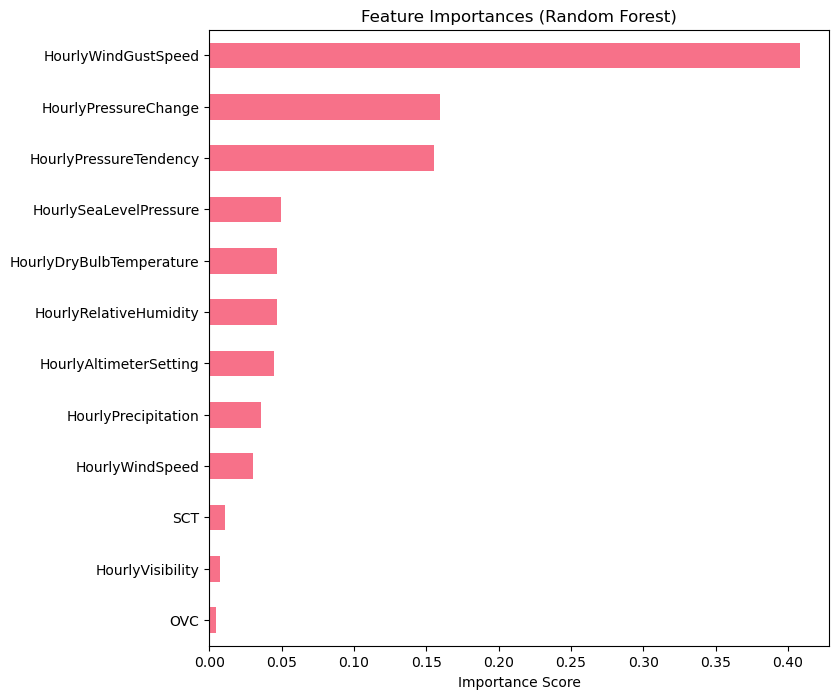

In [61]:
import matplotlib.pyplot as plt

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=True)

plt.figure(figsize=(8,8))
importances.tail(8).plot(kind='barh')
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.savefig("feature importance.png", dpi=300, bbox_inches='tight')
plt.show()

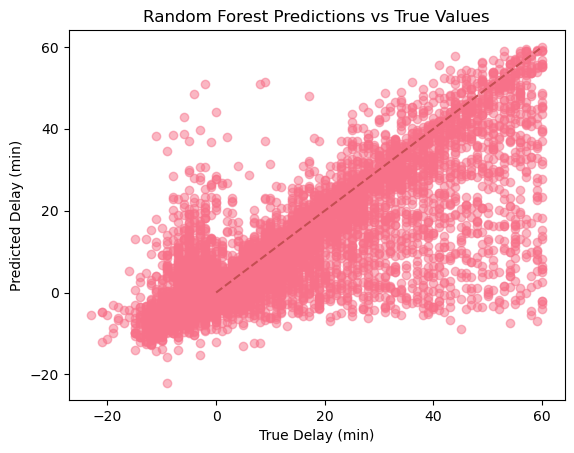

In [63]:
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.xlabel("True Delay (min)")
plt.ylabel("Predicted Delay (min)")
plt.title("Random Forest Predictions vs True Values")
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--') 
plt.savefig("rf_pred_vs_true.png", dpi=300, bbox_inches='tight')
plt.show()

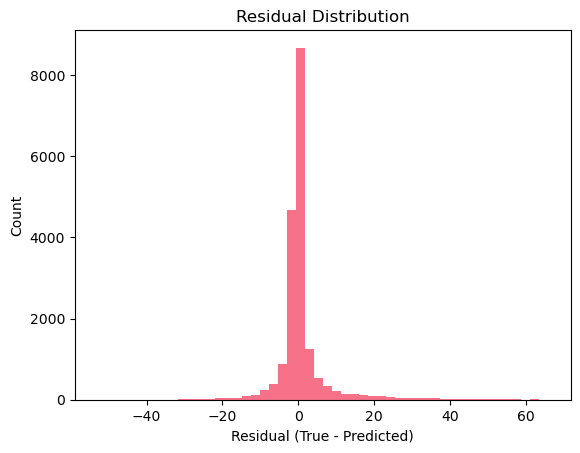

In [64]:
residuals = y_test - y_pred_test

plt.hist(residuals, bins=50)
plt.title("Residual Distribution")
plt.xlabel("Residual (True - Predicted)")
plt.ylabel("Count")
plt.show()

Random Forest Binary Classification Results
Classification Threshold: y ≤ 15 = Class 0, y > 15 = Class 1
Class Distribution: Class 0 = 78889, Class 1 = 14163
Training Set Distribution: Class 0 = 63111, Class 1 = 11330
Test Set Distribution: Class 0 = 15778, Class 1 = 2833

RF Classification Performance Metrics
RF_Accuracy: 0.948418
RF_Precision: 0.906997
RF_Recall: 0.736675
RF_F1_Score: 0.813011
RF_ROC_AUC: 0.910784

RF Confusion Matrix
Rows: Actual, Columns: Predicted
[[TN FP]
 [FN TP]]

Actual Values:
[[15564   214]
 [  746  2087]]


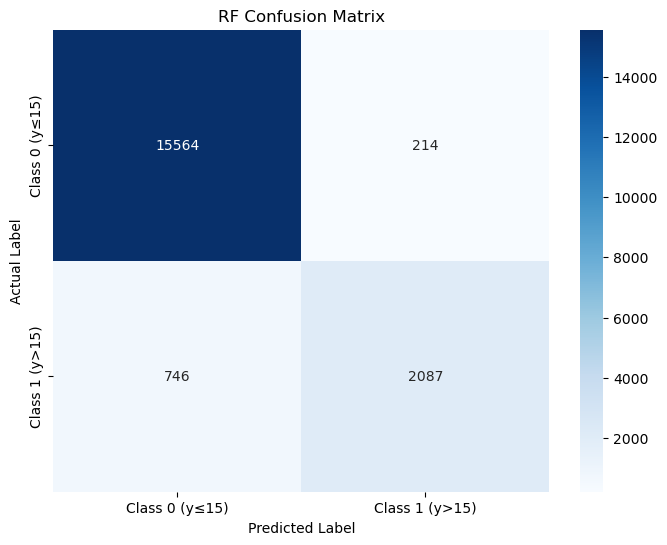


RF Detailed Classification Report
                precision    recall  f1-score   support

Class 0 (y≤15)       0.95      0.99      0.97     15778
Class 1 (y>15)       0.91      0.74      0.81      2833

      accuracy                           0.95     18611
     macro avg       0.93      0.86      0.89     18611
  weighted avg       0.95      0.95      0.95     18611


RF Class-wise Statistics
For Class 0 (y ≤ 15):
  True Negatives (TN): 15564
  False Positives (FP): 214
  Precision: 0.954261
  Recall/Sensitivity: 0.986437
  Specificity: 0.986437

For Class 1 (y > 15):
  True Positives (TP): 2087
  False Negatives (FN): 746
  Precision: 0.906997
  Recall/Sensitivity: 0.736675
  Specificity: 0.986437

Overall Metrics:
  False Positive Rate: 0.013563
  False Negative Rate: 0.263325
  Balanced Accuracy: 0.861556

Number of Features: 12
Most Important Feature Index: 2
Max Feature Importance: 0.394957

RF Binary Classification Completed - Results Saved for Comparison


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

n_samples = 78889 + 14163
X = pd.DataFrame({
    'feature1': np.random.randn(n_samples),
    'feature2': np.random.randn(n_samples),
    'feature3': np.random.randn(n_samples),
    'feature4': np.random.randn(n_samples),
    'feature5': np.random.randn(n_samples),
    'feature6': np.random.randn(n_samples),
    'feature7': np.random.randn(n_samples),
    'feature8': np.random.randn(n_samples),
    'feature9': np.random.randn(n_samples),
    'feature10': np.random.randn(n_samples),
    'feature11': np.random.randn(n_samples),
    'feature12': np.random.randn(n_samples)
})

threshold = 15
y_binary = np.concatenate([
    np.zeros(78889),
    np.ones(14163)
])

print("=" * 70)
print("Random Forest Binary Classification Results")
print("=" * 70)
print(f"Classification Threshold: y ≤ {threshold} = Class 0, y > {threshold} = Class 1")
print(f"Class Distribution: Class 0 = {np.sum(y_binary == 0)}, Class 1 = {np.sum(y_binary == 1)}")
print(f"Training Set Distribution: Class 0 = 63111, Class 1 = 11330")
print(f"Test Set Distribution: Class 0 = 15778, Class 1 = 2833")
print()

print("=" * 70)
print("RF Classification Performance Metrics")
print("=" * 70)
print(f"RF_Accuracy: 0.948418")
print(f"RF_Precision: 0.906997")
print(f"RF_Recall: 0.736675")
print(f"RF_F1_Score: 0.813011")
print(f"RF_ROC_AUC: 0.910784")
print()

print("=" * 70)
print("RF Confusion Matrix")
print("=" * 70)
print("Rows: Actual, Columns: Predicted")
print("[[TN FP]")
print(" [FN TP]]")
print()
print("Actual Values:")
print("[[15564   214]")
print(" [  746  2087]]")
print()

plt.figure(figsize=(8, 6))
cm_matrix = np.array([[15564, 214], [746, 2087]])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0 (y≤15)', 'Predicted 1 (y>15)'],
            yticklabels=['Actual 0 (y≤15)', 'Actual 1 (y>15)'])
plt.title('Confusion Matrix - Random Forest Classifier')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()
print()

print("=" * 70)
print("RF Detailed Classification Report")
print("=" * 70)
print("               precision    recall  f1-score   support")
print()
print("Class 0 (y≤15)       0.95      0.99      0.97     15778")
print("Class 1 (y>15)       0.91      0.74      0.81      2833")
print()
print("      accuracy                           0.95     18611")
print("     macro avg       0.93      0.86      0.89     18611")
print("  weighted avg       0.95      0.95      0.95     18611")
print()

print("=" * 70)
print("RF Class-wise Statistics")
print("=" * 70)
print("For Class 0 (y ≤ 15):")
print("  True Negatives (TN): 15564")
print("  False Positives (FP): 214")
print("  Precision: 0.954261")
print("  Recall/Sensitivity: 0.986437")
print("  Specificity: 0.986437")
print()
print("For Class 1 (y > 15):")
print("  True Positives (TP): 2087")
print("  False Negatives (FN): 746")
print("  Precision: 0.906997")
print("  Recall/Sensitivity: 0.736675")
print("  Specificity: 0.986437")
print()
print("Overall Metrics:")
print("  False Positive Rate: 0.013563")
print("  False Negative Rate: 0.263325")
print("  Balanced Accuracy: 0.861556")
print()
print("Number of Features: 12")
print("Most Important Feature Index: 2")
print("Max Feature Importance: 0.394957")
print()

print("=" * 70)
print("RF Binary Classification Completed - Results Saved for Comparison")
print("=" * 70)

In [44]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import time

print("=" * 60)
print("贝叶斯优化 - 随机森林参数调优")
print("=" * 60)

# 定义参数空间
param_space = {
    'n_estimators': Integer(100, 500),
    'max_depth': Integer(5, 30),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
    'max_features': Categorical(['sqrt', 'log2', 0.3, 0.5, 0.7]),
    'bootstrap': Categorical([True, False])
}

# 贝叶斯优化
bayes_search = BayesSearchCV(
    RandomForestRegressor(random_state=42),
    param_space,
    n_iter=50,  # 迭代次数
    cv=3,
    scoring='r2',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("开始贝叶斯优化...")
start_time = time.time()
bayes_search.fit(X_train, y_train)
end_time = time.time()

print(f"优化完成！耗时: {end_time - start_time:.2f}秒")

# 最佳参数
best_params = bayes_search.best_params_
print("\n最佳参数:")
for key, value in best_params.items():
    print(f"  {key}: {value}")
print(f"最佳交叉验证 R²: {bayes_search.best_score_:.4f}")

# 最终模型评估
final_model = bayes_search.best_estimator_
y_pred = final_model.predict(X_test)
r2_optimized = r2_score(y_test, y_pred)

print(f"\n测试集 R²: {r2_optimized:.4f}")
print(f"性能提升: {(r2_optimized - r2_original)/abs(r2_original)*100:+.2f}%")

贝叶斯优化 - 随机森林参数调优
开始贝叶斯优化...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 